<details>
<summary><strong>Project Summary: Customer Churn Modeling (Click to Expand)</strong></summary>

# Modeling Churn in Energy Company

## Project Overview

This project addresses the business problem of **customer churn in the energy sector**, specifically for an electricity provider operating in a competitive market. The company serves small and medium enterprises (SMEs) who are contractually free to switch suppliers at any time, leading to significant customer attrition concerns.

The objective is to build a predictive model that can identify customers at risk of churn based on historical data, customer characteristics, and service usage patterns. This enables the business to proactively design retention strategies targeting those customers most likely to leave.

This project is structured according to the **Analytics CRISP-DM Template (Revised)**, ensuring that the approach follows a rigorous, industry-standard methodology from problem definition through to deployment and decision support.

## Business Problem Definition

- **Goal:**  
Develop a churn prediction model to classify customers as likely to churn or stay.

- **Purpose:**  
Inform the design of commercial interventions, such as offering tailored discounts or service adjustments, to mitigate churn.

- **Decision Support Objective:**  
The model’s output will guide whether the company should offer a **20% discount** to high-risk customers and whether such an incentive is financially justified.

- **Key Questions Addressed in This Project:**  
1. **Who is likely to churn?**  
2. **What are the most influential variables explaining churn?**  
3. **Are there correlations between customers’ contracted power and consumption behavior?**  
4. **Is churn influenced by the sales channel through which customers were acquired?**  
5. **Given predicted churn risk, is offering a 20% discount a financially viable retention strategy?**

## Data Sources

- **Client Data (`client_data.csv`):**  
Contains customer-level information including contract tenure, consumption behavior, number of active products, whether the customer has a gas contract, and the churn flag.

- **Pricing Data (`price_data.csv`):**  
Contains historical price information, including the variable off-peak electricity price associated with each customer over time.

## Modeling Approach

- Apply supervised classification algorithms to predict churn probability for each customer.  
- Investigate relationships between customer characteristics, consumption patterns, and churn outcomes.  
- Evaluate whether offering financial incentives (20% discount) is a financially sound retention strategy for customers identified as high risk.

## Deployment Objective

- Produce a customer-level scoring output that includes:  
  - **Churn probability**  
  - **Binary churn prediction (1/0)**  
  - **Target for retention (True/False based on threshold)**  
  - **Estimated annual revenue per customer**  

- Enable operational teams to use this output for customer retention campaigns and to assess the financial implications of the proposed discount strategy.

## Process Alignment with the Template

This project follows the structured phases defined in the **Analytics CRISP-DM Template (Revised).docx**:

1. **Business Understanding** - Clarify the problem, define success criteria, and translate business goals into data mining goals.  
2. **Data Understanding** - Gather, explore, and assess data quality, including initial data analysis and data quality checks.  
3. **Data Preparation** - Construct the Analytical Base Table (ABT), perform feature engineering, and prepare data for modeling.  
4. **Modeling** - Develop and evaluate multiple machine learning models including Logistic Regression, Decision Trees, and Random Forests, applying techniques to handle class imbalance where appropriate.  
5. **Evaluation** - Assess models not only on statistical performance (ROC AUC, Precision, Recall, F1) but also in terms of business implications, including financial viability of the retention offer.  
6. **Deployment** - Generate the scoring output, develop retention targeting lists, and support financial decision-making.

## Deliverables

- Predictive churn model with validated performance metrics.  
- Customer scoring output including churn probability, prediction flag, targeting flag, and revenue estimates.  
- Financial impact assessment to determine whether offering a 20% discount to high-risk customers is financially justified.  
- Documentation of key drivers of churn and actionable business recommendations for commercial teams.

---

* **Project brief**: Modelling Churn in Energy Company.docx
* **Process Reference**: Analytics CRISP DM-Template revised.docx
* **Textbook**: Delen, D. (2021). *Predictive Analytics: Data Mining, Machine Learning and Data Science for Practicioners* (Second Edition). Pearson.
</details>

# Prepare the environment

## Installation of Required Python Libraries

This notebook uses the following key libraries:
- `pandas` for data manipulation
- `numpy` for numerical computations
- `matplotlib` and `seaborn` for data visualization
- `scikit-learn` (`sklearn`) for machine learning models and evaluation
- `imbalanced-learn` (`imblearn`) to address any class imbalance issues, common in churn prediction problems

If you are running this notebook in Google Colab, the installation commands below will ensure that any libraries not already installed are made available.

If running in a local Jupyter Notebook, these commands can be commented out if the libraries are already installed.


In [1]:
# Install necessary libraries

!pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn


# Prepare the session

## Importing Required Libraries

This section initializes the computational environment by importing the necessary Python libraries that support the analytics tasks in this project. Each library is selected to serve a specific role in the end to end data analytics process:

- **`pandas`** and **`numpy`**: These libraries are essential for handling structured data and performing numerical computations. They enable data exploration, transformation, and preparation for modeling.

- **`matplotlib`** and **`seaborn`**: These are visualization libraries used to create clear and informative graphical representations of data distributions, variable relationships, and model results. This is particularly important for understanding customer churn patterns and communicating insights effectively.

- **`scikit-learn (sklearn)`**: This is a comprehensive machine learning toolkit that provides algorithms for classification, including Logistic Regression, Decision Trees, and Random Forests. It also includes functions for preprocessing (such as scaling and encoding), model validation (including cross-validation), and performance evaluation.

- **`imbalanced-learn (imblearn)`**: This library is designed to handle class imbalance, a common issue in churn prediction where customers who churn are often a minority. Techniques such as SMOTE (Synthetic Minority Over-sampling Technique) are used to improve model performance in such cases.

- **`matplotlib.ticker`** and **`FancyBboxPatch`**: These are used for customizing visual elements such as diagrams and tick formatting in plots.

- **`IPython.display`**: This enhances the readability of notebook outputs by allowing markdown rendering within the notebook cells.

- **`warnings`**: This suppresses non-critical system warnings, keeping the notebook outputs clean and focused.

### Process Alignment
This step corresponds to the “Initial Assessment of Tools and Techniques” within the Data Preparation phase of the project template (*Anlytics CRISP DM-Template revised.docx*). It ensures that the computational environment is properly configured prior to initiating data understanding, preparation, modeling, and evaluation tasks.

It aligns with the Data Preparation step in the CRISP-DM framework, which involves selecting appropriate tools and techniques necessary for the analysis process. Establishing this technical foundation is critical for enabling accurate data exploration, effective model development, and reliable evaluation.

### Textbook References

* **Chapter 3 - Data Understanding** highlights the importance of preparing the analytical environment as part of the initial data handling process. This includes collecting, describing, and exploring the data.

* **Chapter 5 - Predictive Modeling Preparation** addresses the setup of the technical environment for data transformation, model training, and evaluation. It also emphasizes the importance of selecting appropriate tools and handling class imbalance prior to modeling.


In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch
from IPython.display import Markdown, display
import seaborn as sns

# Machine learning models and utilities
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve, precision_recall_curve
)
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

import time


# Handling class imbalance
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Miscellaneous settings for cleaner outputs
import warnings
warnings.filterwarnings('ignore')

# Setting seaborn style to look better
sns.set(style="whitegrid")

# Initialize list to collect model evaluation metrics
model_results = []


# Load data and explore it

## Data Loading and Initial Inspection

In this step, we load the datasets provided for this project:

1. **`client_data.csv`**: This dataset contains customer related information, including whether a customer has churned or not, along with various demographic, consumption, forecast, and service related attributes.

2. **`price_data.csv`**: This dataset contains pricing information by customer over time, which may influence customer consumption behavior and churn risk.

### Objectives for This Step
- Load both datasets into Pandas DataFrames.
- Perform an initial inspection of each dataset:
  - Display the first few rows to become familiar with the structure.
  - Review the structure and data types of each column.
  - Check for the presence of missing values, which may require handling in later data preparation steps.
  - Begin understanding how the two datasets can be integrated, primarily through the unique customer identifier (`id`), which is essential for future analyses.

A clear understanding of the structure, completeness, and composition of the data at this stage is critical before proceeding with further exploration, feature engineering, or predictive modeling.

---

### Process Alignment
This step corresponds to the following components of the project template (*Analytics CRISP DM-Template revised.docx*):
- **"Collect Initial Data"**
- **"Initial Data Collection Report"**
- **"Describe Data at High Level"**
- **"Data Description Report"**

It directly aligns with the **Data Understanding phase of the CRISP-DM methodology**, specifically the tasks:
- **Collect Initial Data**
- **Describe Data**
- **Verify Data Quality**

This step serves as the foundation for the rest of the analytics process, ensuring that the data is suitable for addressing the project’s key business questions.

---

### Textbook References
- **Chapter 3 - Data Understanding**, which emphasizes the critical role of becoming familiar with the dataset structure, verifying the completeness of the data, and performing an initial quality check before engaging in modeling.
- **Chapter 5 - Predictive Modeling Preparation**, where understanding the nature and limitations of the input data influences the design of preprocessing steps.


In [3]:
# Load the datasets
client_data = pd.read_csv('client_data.csv')
price_data = pd.read_csv('price_data.csv')

# Display the first 5 rows of each dataset
print("Client Data Sample:")
display(client_data.head())

print("\nPrice Data Sample:")
display(price_data.head())

# Check the structure and data types
print("\nClient Data Info:")
client_data.info()

print("\nPrice Data Info:")
price_data.info()

# Check for missing values
print("\nMissing Values in Client Data:")
print(client_data.isnull().sum())

print("\nMissing Values in Price Data:")
print(price_data.isnull().sum())


Client Data Sample:


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0



Price Data Sample:


,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0



Client Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_mete

## Exploratory Data Analysis (EDA) - Client Data

In this step, we conduct exploratory data analysis (EDA) on the **`client_data.csv`** dataset to better understand its structure, the distributions of key variables, and the potential relationships between those variables and the target variable, **`churn`**.

### Key Steps:
- **Standardize Column Names:** All column names are converted to lowercase to ensure consistency and avoid issues caused by inconsistent capitalization.
  
- **Verification of Target Variable:** The code confirms whether the **`churn`** variable is present in the dataset. If present, it plots the distribution of churned versus non-churned customers and calculates the overall churn rate as a percentage of the dataset.

- **Numerical Feature Exploration:**
  - Descriptive statistics (mean, standard deviation, min, max) are computed for all numerical columns.
  - Distribution plots (histograms with kernel density estimates) are created for each numerical feature to assess data distribution patterns, detect potential skewness, and identify outliers.

- **Categorical Feature Exploration:**
  - For categorical variables with **fewer than 20 unique categories**, bar plots are generated to visualize how the distribution of each category relates to churn status.
  - For categorical variables with **high cardinality (20 or more unique categories)**, plotting is skipped to avoid clutter. Instead, the top 10 most frequent categories are displayed in tabular format for review.

- **Interpretation Guidance:** For each categorical variable plotted, the output includes text prompts to assist in interpreting whether any categories are disproportionately associated with churn.

### Purpose:
This exploratory step is crucial for developing an intuitive understanding of customer characteristics, identifying variables that may influence churn behavior, and detecting any immediate data quality issues such as missing values, skewness, or imbalanced categories. Insights from this analysis will directly inform the subsequent phases of feature engineering and model selection.

---

### Process Alignment
This step aligns with the **"Data Exploration Report (Descriptive Statistics/Data Profile)"** section of the project template (*Analytics CRISP DM-Template revised.docx*).

It also directly corresponds to the **"Explore Data"** task within the **Data Understanding phase of the CRISP-DM framework**. Specifically, it supports:
- Understanding data distributions.
- Identifying potential predictors of churn.
- Highlighting anomalies, trends, and relationships that will guide feature engineering and modeling decisions.

---

### Textbook References

- **Chapter 3 - Data Understanding**, which emphasizes the importance of examining variable distributions, detecting anomalies, and understanding relationships prior to modeling.
- **Chapter 4 - Descriptive Analytics**, which describes methods for visualizing and summarizing both categorical and numerical variables, as well as interpreting their relevance to the target variable.


Column Names in client_data.csv:
['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn']


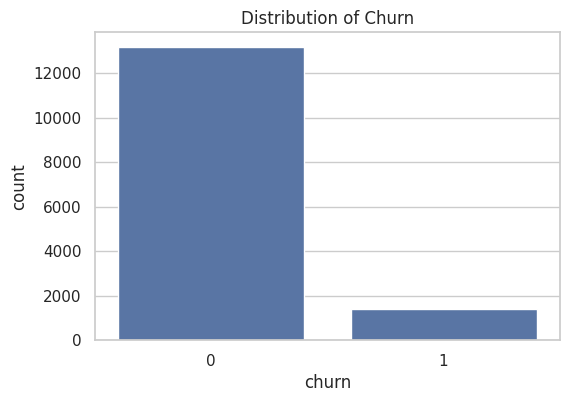

Churn Rate (%):
churn
0    90.284814
1     9.715186
Name: proportion, dtype: float64

Summary Statistics for Numerical Features:


,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


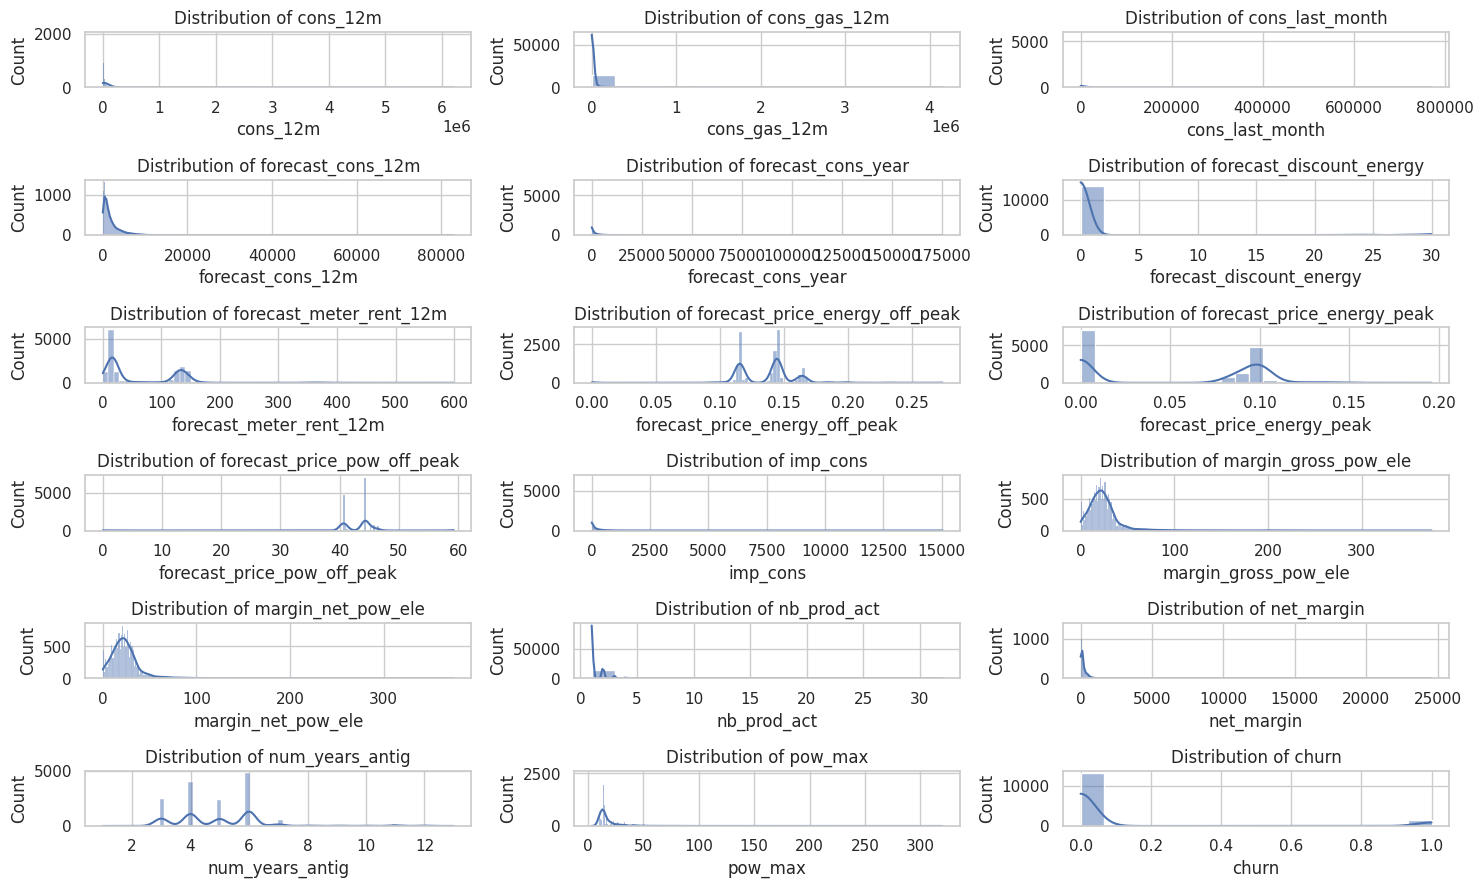

Skipping id: 14606 unique values (too many for countplot).
Here are the top 10 most common values for id:

id
563dde550fd624d7352f3de77c0cdfcd    1
24011ae4ebbe3035111d65fa7c15bc57    1
d29c2c54acc38ff3c0614d0a653813dd    1
764c75f661154dac3a6c254cd082ea7d    1
bba03439a292a1e166f80264c16191cb    1
149d57cf92fc41cf94415803a877cb4b    1
1aa498825382410b098937d65c4ec26d    1
7ab4bf4878d8f7661dfc20e9b8e18011    1
01495c955be7ec5e7f3203406785aae0    1
f53a254b1115634330c12c7fdbf7958a    1
Name: count, dtype: int64




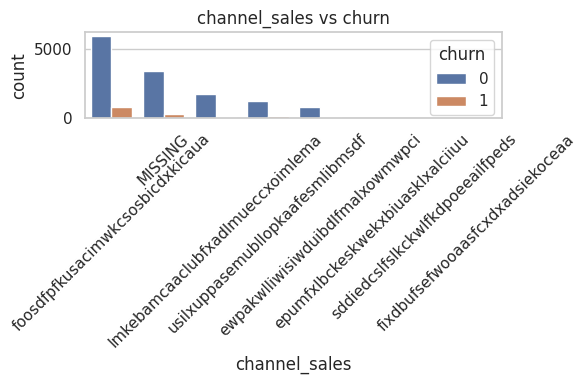

Interpretation Tip for channel_sales:
- Check whether churned customers (churn=1) are disproportionately represented in any category.
- If a category shows a higher proportion of churned customers, it may indicate a risk factor.
- For example, if 'channel_sales' shows more churn in one channel, that channel may require business intervention.

Skipping date_activ: 1796 unique values (too many for countplot).
Here are the top 10 most common values for date_activ:

date_activ
2009-08-01    95
2010-02-01    92
2009-09-01    76
2009-10-01    55
2010-01-11    48
2012-02-01    48
2010-01-18    47
2011-12-15    45
2010-06-10    42
2011-11-23    41
Name: count, dtype: int64


Skipping date_end: 368 unique values (too many for countplot).
Here are the top 10 most common values for date_end:

date_end
2016-02-01    145
2016-08-01    125
2016-09-01    117
2016-10-05    115
2016-12-31    104
2016-10-25    103
2016-09-02     93
2016-06-10     80
2016-06-01     79
2016-10-01     78
Name: count, dtype

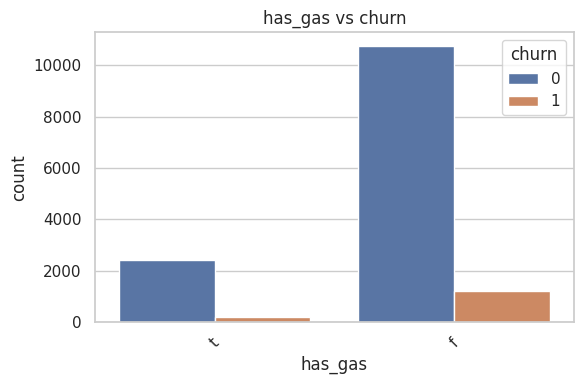

Interpretation Tip for has_gas:
- Check whether churned customers (churn=1) are disproportionately represented in any category.
- If a category shows a higher proportion of churned customers, it may indicate a risk factor.
- For example, if 'channel_sales' shows more churn in one channel, that channel may require business intervention.



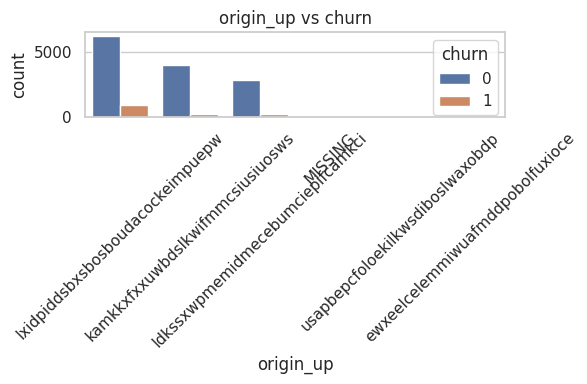

Interpretation Tip for origin_up:
- Check whether churned customers (churn=1) are disproportionately represented in any category.
- If a category shows a higher proportion of churned customers, it may indicate a risk factor.
- For example, if 'channel_sales' shows more churn in one channel, that channel may require business intervention.



In [4]:
# Normalize all column names to lowercase
client_data.columns = client_data.columns.str.lower()
price_data.columns = price_data.columns.str.lower()

# Define target column name
target_column = 'churn'

# Check available columns
print("Column Names in client_data.csv:")
print(client_data.columns.tolist())

# Check if target column exists and plot its distribution
if target_column in client_data.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x=target_column, data=client_data)
    plt.title('Distribution of Churn')
    plt.show()

    churn_rate = client_data[target_column].value_counts(normalize=True) * 100
    print("Churn Rate (%):")
    print(churn_rate)
else:
    print(f"Target variable '{target_column}' not found in client_data.")

# Summary statistics for numerical features
print("\nSummary Statistics for Numerical Features:")
display(client_data.describe())

# Plot distributions of numerical features
num_cols = client_data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols) // 3 + 1, 3, i + 1)
    sns.histplot(client_data[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Explore categorical variables and how they relate to churn (if churn exists)

# Select categorical columns
cat_cols = client_data.select_dtypes(include=['object']).columns

# Loop through categorical variables
for col in cat_cols:
    unique_vals = client_data[col].nunique()

    # Skip the target variable itself
    if col == target_column:
        continue

    if unique_vals < 20:
        # Plot for low-cardinality categorical variables
        plt.figure(figsize=(6, 4))

        if target_column in client_data.columns:
            sns.countplot(x=col, data=client_data, hue=target_column)
            plt.title(f'{col} vs {target_column}')
        else:
            sns.countplot(x=col, data=client_data)
            plt.title(f'{col} Distribution')

        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Print interpretation tips
        print(f"Interpretation Tip for {col}:")
        print(f"- Check whether churned customers (churn=1) are disproportionately represented in any category.")
        print(f"- If a category shows a higher proportion of churned customers, it may indicate a risk factor.")
        print(f"- For example, if 'channel_sales' shows more churn in one channel, that channel may require business intervention.\n")

    else:
        # For high-cardinality variables, summarize instead of plotting
        print(f"Skipping {col}: {unique_vals} unique values (too many for countplot).")
        print(f"Here are the top 10 most common values for {col}:\n")
        print(client_data[col].value_counts().head(10))
        print("\n")



### Correlation Analysis Between Subscribed Power and Consumption

A key business question identified in the project is whether there is a correlation between the **subscribed power (`pow_max`)** and the **consumption behavior of customers**.

Understanding this relationship is important for determining whether customers with higher subscribed power tend to consume more electricity. This insight can influence pricing strategies, customer segmentation, operational planning, and potentially churn risk.

### Key Steps
- Select the following variables related to consumption behavior:
  - **`pow_max`**: Subscribed power (contracted maximum demand).
  - **`cons_12m`**: Total electricity consumption over the past 12 months.
  - **`cons_last_month`**: Electricity consumption in the most recent month.
  - **`imp_cons`**: Current paid consumption (imported consumption).
  - **`forecast_cons_12m`**: Forecasted electricity consumption over the next 12 months.

- Compute the **Pearson correlation matrix** to quantify the linear relationships between `pow_max` and each of the consumption variables.

- Visualize the correlation matrix using a heatmap to provide a clear summary of the correlation strengths.

- Generate scatter plots comparing `pow_max` against each consumption variable to visually inspect the nature of these relationships and assess whether they appear linear, clustered, or dispersed.

### Interpretation of Correlation Results
- The **Pearson correlation coefficient** ranges from **-1 to +1**:
  - Values close to **+1** indicate a strong positive linear relationship (as subscribed power increases, consumption increases).
  - Values close to **0** suggest no linear relationship.
  - Values close to **-1** indicate a strong negative relationship.

- The scatter plots complement the correlation matrix by providing a visual understanding of the relationships. Observing whether the points form a discernible pattern helps validate the numeric correlation.

- These results answer the specific project question of whether customers’ consumption patterns align with their subscribed power levels, which has direct implications for operational efficiency, pricing decisions, and targeting retention interventions.

### Process Alignment
This analysis corresponds to the **"Data Exploration Report (Descriptive Statistics/Data Profile)"** section within the **Data Understanding phase** of the project template (*Analytics CRISP DM-Template revised.docx*).

It aligns directly with the **"Explore Data"** task within the **CRISP-DM framework**, where the goal is to identify patterns, relationships, and anomalies in the data that are relevant to the business problem.

This analysis explicitly addresses one of the formal project questions:  
- **“Is there a correlation between subscribed power (`pow_max`) and consumption (`cons_12m`)?”**

### Textbook References
- **Chapter 3 - Data Understanding**, which emphasizes the importance of data exploration and the identification of relationships among variables.
- **Chapter 4 - Descriptive Analytics**, which outlines statistical techniques such as correlation analysis and visual exploration to understand data behavior before predictive modeling.



Correlation Matrix:
                    pow_max  cons_12m  cons_last_month  imp_cons  \
pow_max            1.000000  0.082889         0.074529  0.260808   
cons_12m           0.082889  1.000000         0.968212  0.159711   
cons_last_month    0.074529  0.968212         1.000000  0.187034   
imp_cons           0.260808  0.159711         0.187034  1.000000   
forecast_cons_12m  0.393946  0.193947         0.177773  0.634600   

                   forecast_cons_12m  
pow_max                     0.393946  
cons_12m                    0.193947  
cons_last_month             0.177773  
imp_cons                    0.634600  
forecast_cons_12m           1.000000  


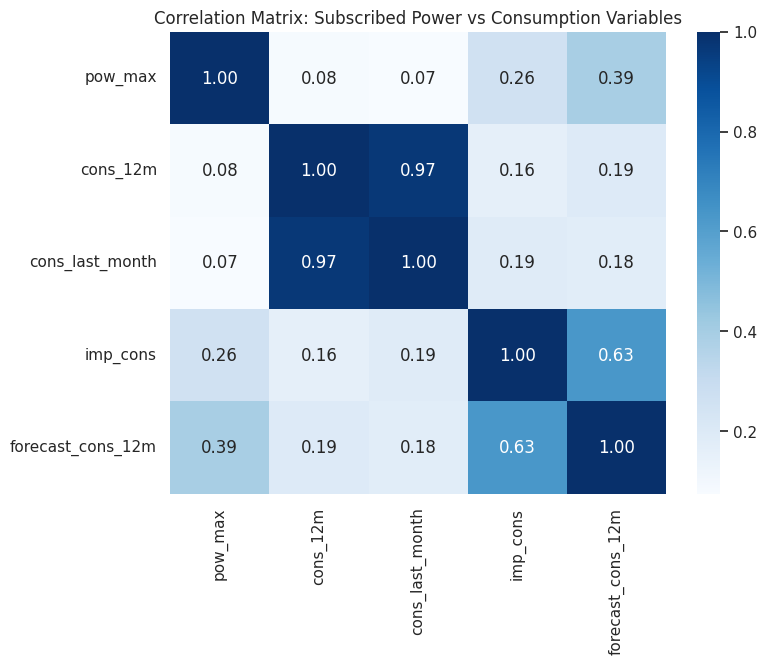

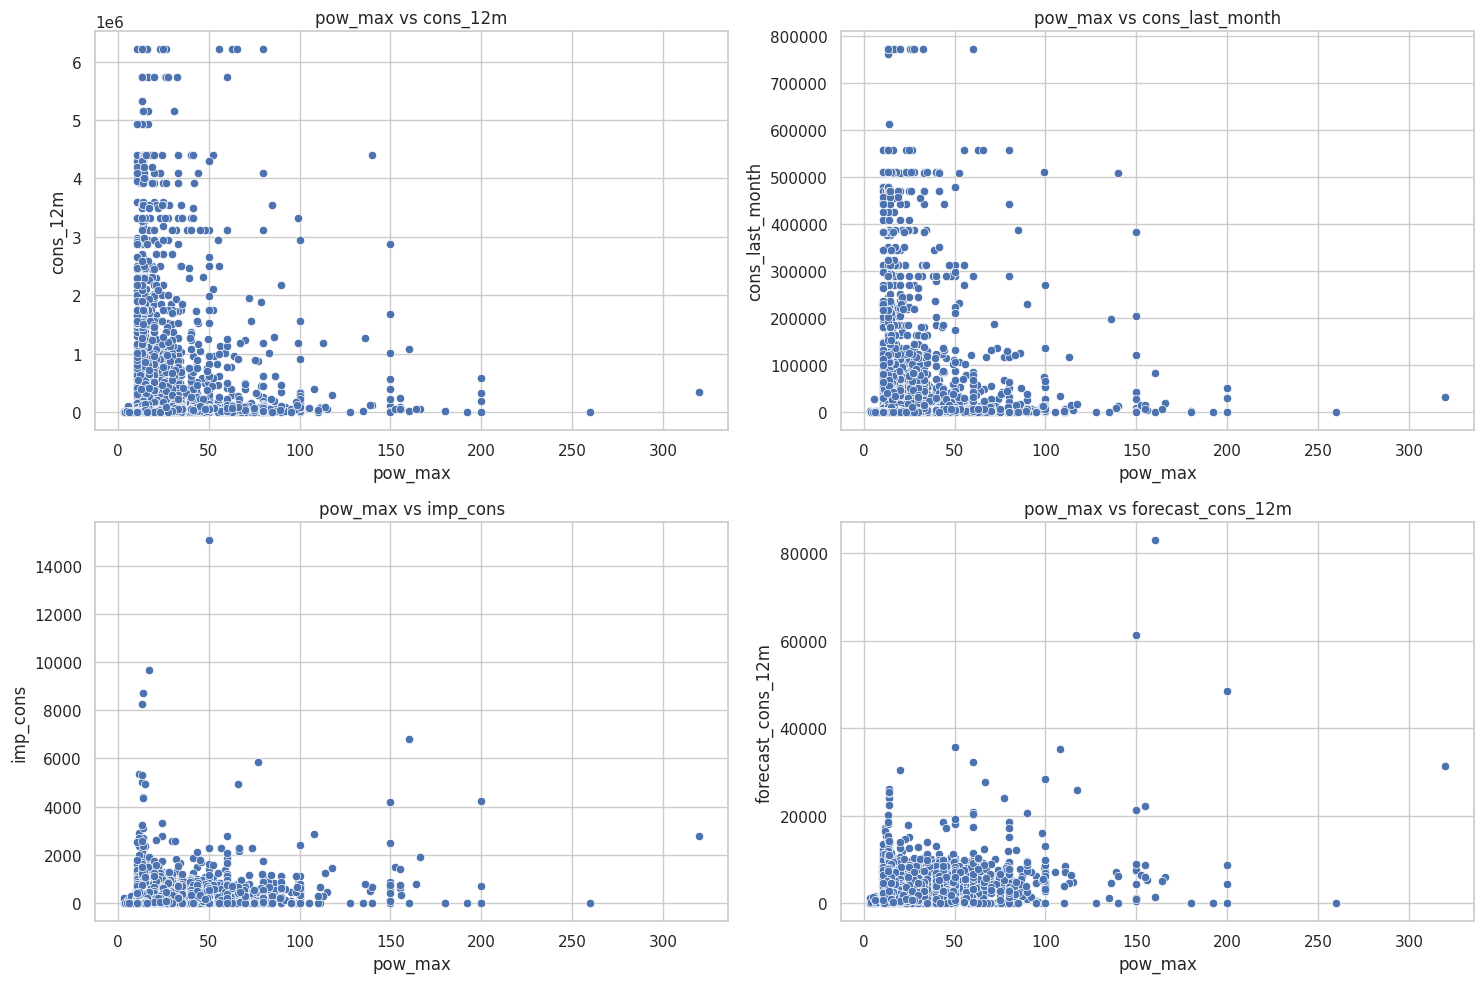

In [5]:
# Select relevant variables
corr_vars = ['pow_max', 'cons_12m', 'cons_last_month', 'imp_cons', 'forecast_cons_12m']

# Compute Pearson correlation matrix
corr_matrix = client_data[corr_vars].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Plot the correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix: Subscribed Power vs Consumption Variables')
plt.show()

# Scatter plots to visually inspect relationships
plt.figure(figsize=(15, 10))

for idx, col in enumerate(corr_vars[1:]):  # Skip 'pow_max' as it is the x-axis
    plt.subplot(2, 2, idx + 1)
    sns.scatterplot(x='pow_max', y=col, data=client_data)
    plt.title(f'pow_max vs {col}')
    plt.xlabel('pow_max')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


### Analysis of Relationship Between Channel Sales and Churn

Another key business question is whether the **sales channel (`channel_sales`)** has an influence on customer churn.

Understanding this relationship helps PowerCo determine whether certain channels are associated with higher churn rates. This insight can inform strategies to improve customer retention, optimize channel management, or adjust sales processes to reduce churn risk.

### Key Steps
1. Generate a **cross-tabulation** between `channel_sales` and `churn` to observe the distribution of churned and retained customers across different sales channels.

2. Conduct a **chi-squared test of independence** to determine whether the relationship between `channel_sales` and `churn` is statistically significant:
   - The null hypothesis assumes that churn is independent of the sales channel.
   - The alternative hypothesis assumes that churn is dependent on the sales channel.

3. Visualize the churn distribution across sales channels using a **stacked bar chart**, where the proportion of churned versus non-churned customers is displayed for each channel.

### Interpretation of Results
- The **cross-tabulation** displays the counts of churned and retained customers by sales channel.

- The **chi-squared test** provides:
  - A **chi-squared statistic**, a **p-value**, and **degrees of freedom**.
  - A **p-value less than 0.05** indicates that the relationship between `channel_sales` and churn is statistically significant, meaning churn rates vary by sales channel.
  - A **p-value greater than or equal to 0.05** suggests there is no statistically significant relationship; churn does not meaningfully differ across sales channels.

- The **stacked bar chart** visually highlights which channels have higher or lower proportions of churn, helping to quickly identify patterns.

This analysis directly addresses one of the specific project questions:  
- **"Is there a link between channel sales (`channel_sales`) and churn?"**  

It provides evidence-based insight into whether certain sales channels require targeted churn mitigation strategies.

### Process Alignment
This analysis corresponds to the **"Data Exploration Report (Descriptive Statistics/Data Profile)"** section within the **Data Understanding phase** of the project template (*Analytics CRISP DM-Template revised.docx*).

It aligns with the **"Explore Data"** task in the **CRISP-DM framework**, focusing on understanding patterns in categorical variables and detecting potential risk factors for churn based on customer acquisition channels.

### Textbook References

- **Chapter 3 - Data Understanding**, which emphasizes data exploration to detect variable relationships.
- **Chapter 4 - Descriptive Analytics**, which discusses statistical techniques for analyzing categorical data, including contingency tables and chi-squared tests.



Cross-tabulation of channel_sales and churn:
churn                                0    1
channel_sales                              
MISSING                           3442  283
epumfxlbckeskwekxbiuasklxalciiuu     3    0
ewpakwlliwisiwduibdlfmalxowmwpci   818   75
fixdbufsefwooaasfcxdxadsiekoceaa     2    0
foosdfpfkusacimwkcsosbicdxkicaua  5934  820
lmkebamcaaclubfxadlmueccxoimlema  1740  103
sddiedcslfslkckwlfkdpoeeailfpeds    11    0
usilxuppasemubllopkaafesmlibmsdf  1237  138

Chi-squared Test Results:
Chi2 Statistic = 103.7845
Degrees of Freedom = 7
P-value = 0.0000

Conclusion: There is a statistically significant relationship between channel_sales and churn (p < 0.05).


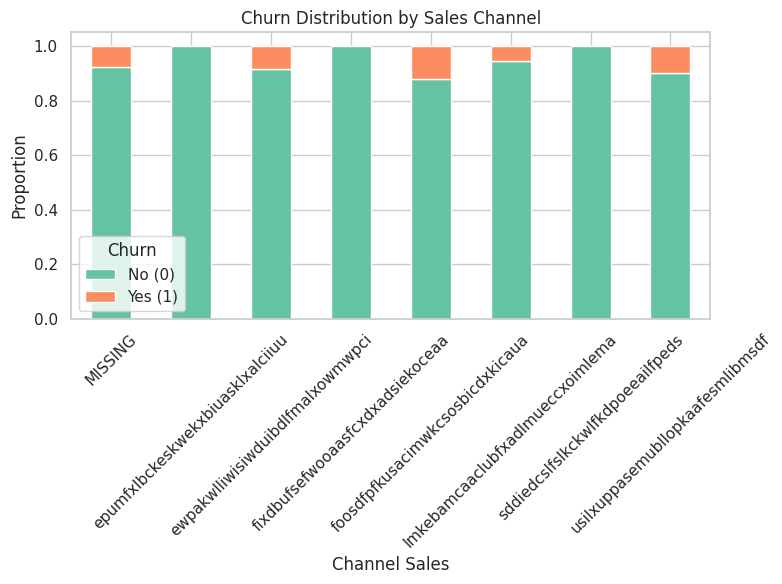

In [6]:
from scipy.stats import chi2_contingency

# Cross-tabulation of channel_sales vs churn
channel_churn_ct = pd.crosstab(client_data['channel_sales'], client_data['churn'])
print("Cross-tabulation of channel_sales and churn:")
print(channel_churn_ct)

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(channel_churn_ct)

print("\nChi-squared Test Results:")
print(f"Chi2 Statistic = {chi2:.4f}")
print(f"Degrees of Freedom = {dof}")
print(f"P-value = {p:.4f}")

if p < 0.05:
    print("\nConclusion: There is a statistically significant relationship between channel_sales and churn (p < 0.05).")
else:
    print("\nConclusion: There is no statistically significant relationship between channel_sales and churn (p >= 0.05).")

# Plot churn rates by channel
channel_churn_rate = (
    client_data.groupby('channel_sales')['churn']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)

channel_churn_rate.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 6),
    color=['#66c2a5', '#fc8d62']
)

plt.title('Churn Distribution by Sales Channel')
plt.xlabel('Channel Sales')
plt.ylabel('Proportion')
plt.legend(title='Churn', labels=['No (0)', 'Yes (1)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Exploratory Data Analysis (EDA) - Price Data

In this step, the **`price_data.csv`** dataset is explored to understand its structure, key numerical distributions, and potential data quality issues.

### Key Steps
- **Column Inspection:**
  - Display the full list of column names present in the dataset.

- **Structure Review:**
  - Display the first five rows of the dataset to observe the structure and sample values.
  - Display the data types and memory usage for each column using the `.info()` method.

- **Summary Statistics:**
  - Generate descriptive statistics for all numerical columns using `.describe()`. This includes count, mean, standard deviation, minimum, maximum, and quartile values.

- **Missing Value Check:**
  - Compute and display the total number of missing values for each column.

- **Numerical Feature Exploration:**
  - For all numerical variables, generate histograms with kernel density estimates (`kde=True`) to visualize their distributions. This is done for each numerical column individually.

- **Categorical Feature Exploration:**
  - Identify all columns with a data type classified as `object` (categorical).
  - For categorical variables with **fewer than 20 unique values**, generate count plots to show frequency distributions.
  - For categorical variables with **20 or more unique values**, skip plotting and instead display the top 10 most frequent categories in tabular form.

### Purpose
This step is focused on understanding the distribution patterns of price-related variables and verifying the data quality of the pricing dataset. It identifies whether there are categorical variables with meaningful groupings and examines how numerical pricing variables are distributed.

There is no correlation analysis, no merging with the client dataset, and no exploration of relationships in this step. This step strictly focuses on reviewing the **structure, distributions, and completeness of the price data itself**.

---

### Process Alignment
This step aligns with the following components of the project template (*Analytics CRISP DM-Template revised.docx*):
- **"Data Exploration Report (Descriptive Statistics/Data Profile)"**
- **"Verify Data Quality"**
- **"Data Set Description"**

It is part of the **Data Understanding phase of the CRISP-DM framework**, specifically focused on understanding the distribution, structure, and completeness of the **`price_data.csv`** dataset.

---

### Textbook References
This step directly applies methods from:
- **Chapter 3 - Data Understanding**, which emphasizes inspecting dataset structure, summarizing data types, and checking for missing values.
- **Chapter 4 - Descriptive Analytics**, which includes procedures for generating descriptive statistics for numerical variables and using frequency distributions to explore categorical variables.



Column Names in price_data.csv:
['id', 'price_date', 'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']


,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0



Structure of price_data.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB

Summary Statistics for Numerical Features:


,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221



Missing Values in Price Data:
id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64


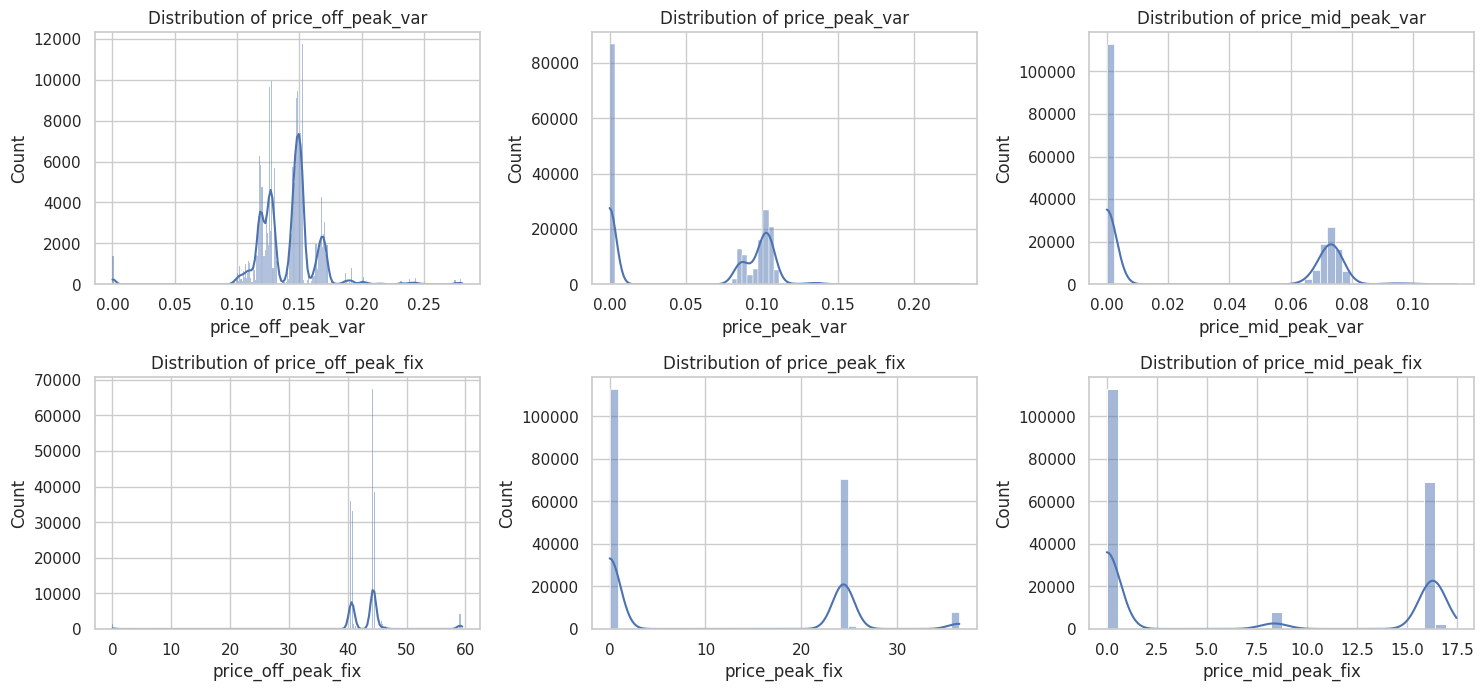

Skipping id: 16096 unique values (too many for countplot).
Here are the top 10 most common values for id:

id
c18b6305122e4976739b8420d5b54ec5    12
e4053a0ad6c55e4665e8e9adb9f75db5    12
1221993f581c1b335d231e247028d40d    12
2dc2c9a9f6e6896d9a07d7bcbb9d0ce9    12
762cab733464cae4ce1d452ce84cb94b    12
26a5c8aa93a5caa4b6899c3b269279a0    12
f85d03df6feffaa0bd4a62fc3726c7c5    12
5fab725f9d7a5c6d09b0a273f2ba7978    12
eaabff20c9ea30814025daf7cc2cbb53    12
377c0b44370165e36eceff4db57eeb31    12
Name: count, dtype: int64




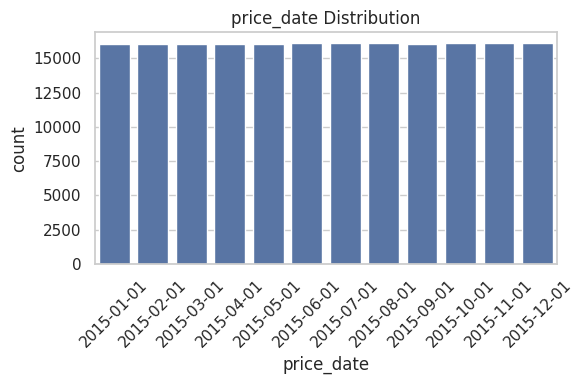

Interpretation Tip for price_date:
- This plot shows the frequency distribution of price_date.
- Look for dominant categories or underrepresented ones, which might inform pricing strategies or segmentation.



In [7]:
# Initial inspection of price data
print("Column Names in price_data.csv:")
print(price_data.columns.tolist())

# Check price_data.csv structure
display(price_data.head())

print("\nStructure of price_data.csv:")
price_data.info()

print("\nSummary Statistics for Numerical Features:")
display(price_data.describe())

# Check for missing values
print("\nMissing Values in Price Data:")
print(price_data.isnull().sum())

# Plot distributions of numerical features
num_cols = price_data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols) // 3 + 1, 3, i + 1)
    sns.histplot(price_data[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Explore categorical variables if present
cat_cols = price_data.select_dtypes(include=['object']).columns

for col in cat_cols:
    unique_vals = price_data[col].nunique()

    if unique_vals < 20:
        plt.figure(figsize=(6, 4))
        sns.countplot(x=col, data=price_data)
        plt.title(f'{col} Distribution')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # Interpretation note
        print(f"Interpretation Tip for {col}:")
        print(f"- This plot shows the frequency distribution of {col}.")
        print(f"- Look for dominant categories or underrepresented ones, which might inform pricing strategies or segmentation.\n")

    else:
        print(f"Skipping {col}: {unique_vals} unique values (too many for countplot).")
        print(f"Here are the top 10 most common values for {col}:\n")
        print(price_data[col].value_counts().head(10))
        print("\n")


# Data Preparation

## ABT Construction

This section constructs the **Analytical Base Table (ABT)**, which serves as the foundation for the modeling process. The ABT contains one row per customer and includes a curated set of features engineered from the raw datasets. This step aligns with the **Data Preparation phase of the CRISP-DM framework**.

---

### Data Merging

The ABT is constructed by merging the customer dataset (`client_data`) with the most recent pricing information from `price_data`. The most recent price is determined for each customer by selecting the record with the latest `price_date`. This is achieved using a group-by operation on `id` combined with the `.last()` function.

---

### Feature Engineering

The following features are engineered based on business relevance and expected predictive power for churn modeling:

| Feature                      | Description                                                         | Reason for Inclusion                                           |
|------------------------------|---------------------------------------------------------------------|---------------------------------------------------------------|
| **forecast_cons_12m**        | Forecasted electricity consumption over the next 12 months         | Indicator of expected customer size and engagement            |
| **price_off_peak_var**       | Most recent off-peak variable price                                | Captures price sensitivity, an important churn driver         |
| **estimated_annual_revenue** | Forecasted consumption × off-peak price                            | Represents customer financial value                           |
| **contract_tenure_months**   | Tenure in months (`num_years_antig × 12`)                          | Longer tenure often correlates with lower churn               |
| **is_long_term_customer**    | Binary indicator (1 if tenure ≥ 24 months, else 0)                 | Simplifies modeling of tenure effects                         |
| **consumption_variance**     | Variance between `cons_12m` and `cons_last_month`                  | Detects usage volatility, which can be a churn signal         |
| **recent_consumption_ratio** | Last month's consumption ÷ forecasted annual consumption           | Identifies reduced recent engagement relative to forecast     |
| **num_active_products**      | Count of active products (`nb_prod_act`)                           | More products often reduce churn risk                         |
| **has_gas_service**          | Binary indicator (1 if gas service is active, else 0)              | Customers with multiple services typically show lower churn   |

---

### Handling Division by Zero

For the feature **`recent_consumption_ratio`**, division by zero is explicitly managed. If `forecast_cons_12m` is zero, the ratio is set to zero. This prevents runtime errors and avoids introducing artificial constants into the data.

---

### Missing Value Handling

Missing values are handled using **median imputation** for any numeric columns in the ABT. This approach is robust against skewed distributions and avoids introducing bias from mean imputation. A missing value check is performed before and after imputation to verify data completeness.

---

### ABT Output

The final ABT (`abt_final`) contains:
- A unique customer identifier (`id`),
- The target variable (`churn`),
- A set of nine engineered features prepared for input into the modeling process.

Sanity checks are performed to confirm:
- The distribution of the target variable (`churn`),
- The shape of the feature matrix (`X`),
- The readiness of the data for the modeling phase.

---

### Purpose of the ABT

This ABT provides a structured, interpretable dataset that supports the Modeling phase. It balances business interpretability with statistical rigor, ensuring that the subsequent analysis is both operationally actionable and analytically sound.

---

### Process Alignment

This step corresponds to the following components of the project template (*Anlytics CRISP DM-Template revised.docx*):
- **"Data Set Description"**
- **"Select Data"**
- **"Construct Data"**
- **"Derived Attributes"**
- **"Merged Data"**
- **"Clean Data"**

It is a direct execution of the **Data Preparation phase within the CRISP-DM framework**, focused on integrating multiple data sources, creating meaningful derived features, handling missing data, and preparing the dataset for supervised learning models.

---

### Textbook References

- **Chapter 3 - Data Understanding**, which emphasizes the necessity of preparing, merging, and cleaning data prior to modeling.
- **Chapter 5 - Predictive Modeling Preparation**, which details the process of constructing derived variables, handling missing data, and preparing the analytical base table (ABT) for machine learning models.


In [8]:
# -------------------------------------------
# Data Preparation — ABT Construction
# -------------------------------------------

# Step 1: Merge client data with the latest available price
latest_prices = price_data.sort_values('price_date').groupby('id').last().reset_index()

abt = client_data.merge(
    latest_prices[['id', 'price_off_peak_var']],
    on='id',
    how='left'
)

print("Merged client_data with latest prices.")

# -------------------------------------------
# Step 2: Feature Engineering
# -------------------------------------------

# Revenue-related feature
abt['estimated_annual_revenue'] = (
    abt['forecast_cons_12m'] * abt['price_off_peak_var']
)

# Contract tenure feature
abt['contract_tenure_months'] = abt['num_years_antig'] * 12
abt['is_long_term_customer'] = (abt['contract_tenure_months'] >= 24).astype(int)

# Usage behavior features
abt['consumption_variance'] = abt[['cons_12m', 'cons_last_month']].var(axis=1)

abt['recent_consumption_ratio'] = np.where(
    abt['forecast_cons_12m'] == 0,
    0,
    abt['cons_last_month'] / abt['forecast_cons_12m']
)

# Contract complexity feature
abt['num_active_products'] = abt['nb_prod_act']

# Gas contract flag
abt['has_gas_service'] = abt['has_gas'].apply(
    lambda x: 1 if str(x).lower() in ['t', 'true', '1'] else 0
)

print("Feature engineering complete.")

# -------------------------------------------
# Step 3: Select Features for Modeling
# -------------------------------------------

feature_cols = [
    'forecast_cons_12m',
    'price_off_peak_var',
    'estimated_annual_revenue',
    'contract_tenure_months',
    'is_long_term_customer',
    'consumption_variance',
    'recent_consumption_ratio',
    'num_active_products',
    'has_gas_service'
]

abt_final = abt[['id', 'churn'] + feature_cols].copy()

# -------------------------------------------
# Step 4: Handle Missing Values
# -------------------------------------------

# Report missing values before imputation
missing_before = abt_final.isnull().sum()
print("\nMissing Values Before Imputation:")
print(missing_before[missing_before > 0])

# Apply median imputation for numeric columns if needed
for col in feature_cols:
    if abt_final[col].isnull().sum() > 0:
        abt_final[col].fillna(abt_final[col].median(), inplace=True)

print("Missing values handled.")

# -------------------------------------------
# Step 5: Define Features (X) and Target (y)
# -------------------------------------------

customer_ids = abt_final['id'].copy()
X = abt_final.drop(columns=['id', 'churn'])
y = abt_final['churn']

# -------------------------------------------
# Step 6: Sanity Checks
# -------------------------------------------

print("\nChurn distribution (%):")
print(y.value_counts(normalize=True) * 100)

print(f"\nPrepared feature set shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")

print("\nPrepared data preview:")
display(X.head())


Merged client_data with latest prices.
Feature engineering complete.

Missing Values Before Imputation:
Series([], dtype: int64)
Missing values handled.

Churn distribution (%):
churn
0    90.284814
1     9.715186
Name: proportion, dtype: float64

Prepared feature set shape: (14606, 9)
Number of features: 9

Prepared data preview:


,forecast_cons_12m,price_off_peak_var,estimated_annual_revenue,contract_tenure_months,is_long_term_customer,consumption_variance,recent_consumption_ratio,num_active_products,has_gas_service
0,0.00,0.146033,0.000000,36,1,0.0,0.000000,2,1
1,189.95,0.147600,28.036620,72,1,10857800.0,0.000000,1,0
2,47.96,0.167798,8.047592,72,1,147968.0,0.000000,1,0
3,240.04,0.148586,35.666583,72,1,1254528.0,0.000000,1,0
4,445.75,0.119906,53.448099,72,1,7601100.5,1.180034,1,0


## Cross-Validation vs. Train/Test Split

This section explains an important modeling decision: whether to use **5-fold stratified cross-validation alone**, or to combine it with a **train/test split**, particularly when working with large datasets.

---

### What This Notebook Currently Does:
- Performs **5-fold stratified cross-validation** on the **entire dataset** for:
  - Model evaluation
  - Model selection
  - Threshold optimization
- After cross-validation, the best model is retrained on the **full dataset** for deployment.

This approach is widely used when:
- The dataset is **small to medium-sized**, and
- The primary objective is to maximize the data used for training the deployed model.

---

### Alternative Approach for Larger Datasets:
A commonly recommended strategy is to apply a **train/test split followed by cross-validation on the training set**, also referred to as:

- **Holdout plus cross-validation**, or  
- **Nested model evaluation**

---

### Process Description:

| Step | Description |
|------|-------------|
| **Step 1** | Perform a **train/test split** (e.g., 75% train, 25% test). The test set remains untouched until final evaluation. |
| **Step 2** | Apply **5-fold stratified cross-validation on the training set** to perform:<br> - Hyperparameter tuning<br> - Model selection<br> - Threshold optimization |
| **Step 3** | Evaluate the selected model on the **holdout test set**, which was not used in any part of the training or model selection process. |

---

### Benefits of This Approach:

| Benefit | Reason |
|---------|--------|
| **Unbiased final evaluation** | The test set remains completely unseen during model training and selection. |
| **Protection against optimistic CV bias** | Even cross-validation can produce overly optimistic estimates if hyperparameters are tuned extensively. |
| **Realistic deployment simulation** | The holdout set acts as a proxy for future, unseen data. |
| **Efficient for large datasets** | Cross-validation is only applied to the training set, reducing computational cost compared to applying it to the entire dataset. |

---

### Rationale

- For **small datasets**, creating a holdout set significantly reduces the amount of data available for both training and validation.
- In such cases, using **cross-validation on the full dataset is statistically more efficient**.
- If the primary objective is **deploying the best possible model**, using all available data after cross-validation (as this notebook does) is a valid and commonly used approach in practice.

---
Both approaches are valid and appropriate under different conditions. The choice depends on the dataset size, the need for an unbiased final performance estimate, and whether the goal is model deployment or formal model assessment.

This notebook uses **5-fold cross-validation on the entire dataset followed by final training on the full dataset**, which is an appropriate and industry-standard method when the goal is operational deployment.


In [9]:
# -------------------------------
# Cross-Validation Setup
# -------------------------------

# uncomment the lines below if you want to do a test/train split
'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)
'''
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Modeling

## Modeling - Naive Bayes Classifier

This section develops a **Naive Bayes model** for predicting customer churn. Naive Bayes is a probabilistic classification algorithm based on **Bayes' Theorem**, assuming that features are conditionally independent given the class label. Despite this assumption rarely being strictly true in real-world data, Naive Bayes often performs well in practice due to its simplicity and robustness.

---

### Modeling Process

1. **Model Configuration:**  
- A **Gaussian Naive Bayes** classifier is selected because the dataset consists primarily of continuous numerical features. This variant assumes that each feature follows a normal (Gaussian) distribution within each class (churn or not churn).

2. **Cross-Validation:**  
- The model is evaluated using **5-fold stratified cross-validation**, ensuring that the class distribution is preserved in each fold.  
- **ROC AUC scores** are computed for each fold and summarized with a mean and standard deviation.
- This provides an estimate of the model's generalization performance.
- A 5-Fold Stratified Cross-Validation is statistically more reliable, reduces variance, respects class imbalance, and uses the data more efficiently than a single train/test split. It is the standard approach for churn modeling and most classification tasks.

3. **Model Training and Prediction:**  
- The model is trained on the full dataset after cross-validation for diagnostics.  
- It generates both class predictions (`0` or `1`) and **probabilistic churn scores**, which represent the predicted probability that a customer will churn.

4. **Evaluation Metrics:**  
- Model performance is assessed using:  
  - **Accuracy**: overall correctness.  
  - **Precision**: the proportion of predicted churners who actually churn.  
  - **Recall**: the proportion of actual churners correctly identified.  
  - **F1 Score**: the harmonic mean of precision and recall.  
  - **ROC Curve and AUC**: threshold-independent measure of discriminative performance.  
  - **Confusion Matrix**: breakdown of true/false positives and negatives.

---

### Rationale for Naive Bayes

Naive Bayes offers several advantages:
- **Simplicity and Speed:** It is computationally efficient and fast to train.  
- **Probabilistic Output:** Provides interpretable probabilities for churn risk.  
- **Baseline Benchmark:** Serves as a useful benchmark model for comparison against more complex models.

However, Naive Bayes relies on the assumption of **feature independence**, which is unlikely to fully hold in this dataset. As such, it may underperform compared to tree-based models or logistic regression, particularly given the correlations present between variables like `pow_max` and `forecast_cons_12m`.

---

### Process Alignment

This step aligns with the **Modeling phase** of the **CRISP-DM framework**, specifically with the tasks of:  
- **"Select Modeling Techniques"**  
- **"Build Model"**  
- **"Assess Model"**  

It is also aligned with the template (*Analytics CRISP DM-Template revised.docx*) under the same modeling and evaluation sections.

---

### Textbook References

This approach is consistent with:  
- **Chapter 5 - Predictive Modeling** of the Dursun Delen textbook, where **Naive Bayes classification** is introduced as a classical machine learning algorithm. The textbook highlights Naive Bayes' simplicity, robustness in high-dimensional spaces, and the trade-offs involved in using a strong assumption of conditional independence.


Cross-Validation ROC AUC Scores: [0.54216943 0.5778133  0.57107549 0.56383161 0.57836808]
Mean ROC AUC: 0.5667
Standard Deviation of ROC AUC: 0.0133
Accuracy: 0.1231
Precision: 0.0993
Recall: 0.9944
F1 Score: 0.1806
ROC AUC: 0.5675
Training time (s): 0.01


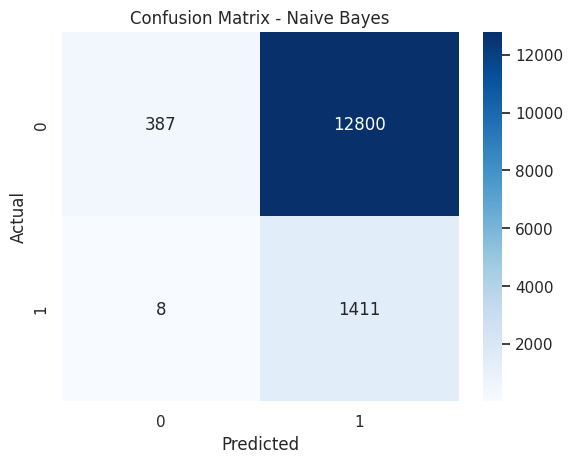


Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.03      0.06     13187
           1       0.10      0.99      0.18      1419

    accuracy                           0.12     14606
   macro avg       0.54      0.51      0.12     14606
weighted avg       0.89      0.12      0.07     14606



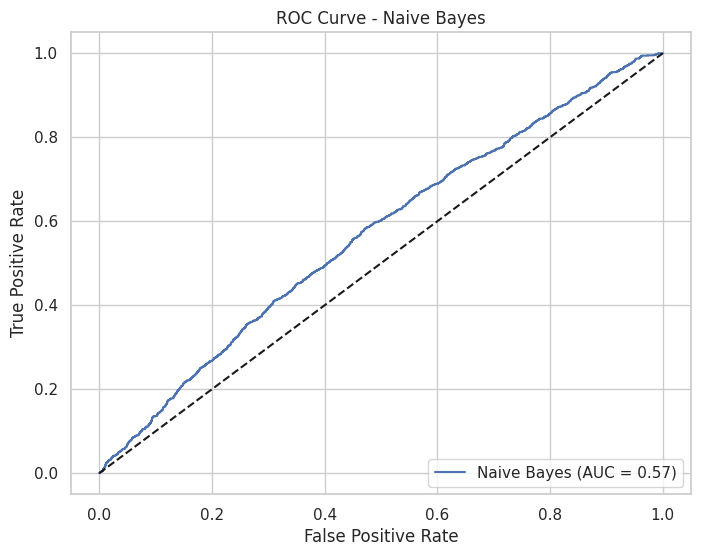

In [10]:
# --------------------
# Naive Bayes Model (With Cross-Validation)
# --------------------

# --------------------
# Cross-Validation Setup
# --------------------

nb_model = Pipeline([
    ('scaler', StandardScaler()),  # Optional but consistent with other models
    ('nb', GaussianNB())
])

# Evaluate model using ROC AUC
cv_scores_nb = cross_val_score(
    nb_model, X, y, cv=cv, scoring='roc_auc' # if using the test/train split use X_train and y_ytrain
)


print("Cross-Validation ROC AUC Scores:", cv_scores_nb)
print("Mean ROC AUC:", round(cv_scores_nb.mean(), 4))
print("Standard Deviation of ROC AUC:", round(cv_scores_nb.std(), 4))

# --------------------
# Fit Final Model on Full Data for Diagnostics and Deployment
# --------------------

start_time = time.time()
nb_model.fit(X, y) # if using the test/train split use X_train and y_train
end_time = time.time()
training_time = round(end_time - start_time, 2)  # in seconds

# Generate predictions (for full dataset diagnostics)
y_pred_nb = nb_model.predict(X) # if using the test/train split us X_test
y_proba_nb = nb_model.predict_proba(X)[:, 1] # if using the test/train split us X_test

# --------------------
# Evaluation Metrics (Descriptive Only)
# --------------------

accuracy = accuracy_score(y, y_pred_nb) # if using the test/train split us y_test
precision = precision_score(y, y_pred_nb) # if using the test/train split us y_test
recall = recall_score(y, y_pred_nb) # if using the test/train split us y_test
f1 = f1_score(y, y_pred_nb) # if using the test/train split us y_test
roc_auc = roc_auc_score(y, y_proba_nb) # if using the test/train split us y_test

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Training time (s): {training_time}")

# --------------------
# Confusion Matrix
# --------------------

cm = confusion_matrix(y, y_pred_nb) # if using the test/train split us y_test
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --------------------
# Classification Report
# --------------------

print("\nClassification Report:\n")
print(classification_report(y, y_pred_nb)) # if using the test/train split us y_test

# --------------------
# ROC Curve (Full Data Diagnostic)
# --------------------

fpr, tpr, thresholds = roc_curve(y, y_proba_nb) # if using the test/train split us y_test

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc='lower right')
plt.show()

# --------------------
# Store Results
# --------------------

model_results.append({
    'Model': 'Naive Bayes',
    'CV Mean ROC AUC': cv_scores_nb.mean(),
    'CV Std ROC AUC': cv_scores_nb.std(),
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1': f1,
    'ROC AUC': roc_auc,
    'Training Time (s)': training_time
})


## Modeling - Logistic Regression

This section develops a **Logistic Regression model** to predict customer churn. Logistic Regression is a widely used statistical method for binary classification tasks because it is both interpretable and provides probabilistic outputs.

---

### Modeling Process

1. **Cross-Validation Setup**  
The model is evaluated using **5-fold stratified cross-validation**, ensuring that the churn class distribution is maintained in each fold. The primary evaluation metric is **ROC AUC**, which measures the model’s ability to discriminate between churners and non-churners regardless of the classification threshold.

2. **Feature Scaling**  
A `StandardScaler` is applied to standardize features to zero mean and unit variance. This step is essential because Logistic Regression is sensitive to feature scaling.

3. **Model Training**  
A Logistic Regression model with a maximum of 1000 iterations (`max_iter=1000`) is used to ensure convergence. The pipeline includes scaling followed by model fitting.

4. **Model Evaluation with Cross-Validation**  
- **ROC AUC scores** are computed for each fold and summarized with a mean and standard deviation.
- This provides an estimate of the model's generalization performance.

5. **Full Dataset Model Fitting for Diagnostics**  
The model is refit on the **entire dataset**, not a train-test split, to:
- Generate predictions (`y_pred`) and probabilities (`y_proba`).
- Calculate descriptive performance metrics:
  - **Accuracy**  
  - **Precision**  
  - **Recall**  
  - **F1 Score**  
  - **ROC AUC**

6. **Confusion Matrix**  
A confusion matrix is generated to show the counts of:
- True Positives (correctly predicted churners)
- True Negatives (correctly predicted non-churners)
- False Positives (incorrectly predicted churners)
- False Negatives (missed churners)

7. **ROC Curve**  
An ROC curve is plotted to visualize the trade-off between true positive rate and false positive rate across thresholds. The area under the ROC curve (**AUC**) summarizes the overall discriminatory power.

8. **Coefficient Interpretation**  
The Logistic Regression coefficients are extracted and visualized:
- A **positive coefficient** indicates that higher values of the feature increase churn probability.
- A **negative coefficient** indicates that higher values decrease churn probability.

This step provides valuable interpretability, offering insight into which factors are most influential in customer churn.

---

### Purpose

Logistic Regression serves as a baseline model due to its:
- High interpretability,
- Probabilistic output useful for threshold-based decision-making,
- Computational efficiency.

The results from this model will be compared with more complex models in subsequent steps.

---

### Process Alignment

This step aligns with the following components of the project template (*Analytics CRISP DM-Template revised.docx*):
- **"Model Selection Description"**
- **"Modeling Technique"**
- **"Build Model"**
- **"Assess Model"**

It is part of the **Modeling phase in the CRISP-DM framework**, where a predictive model is constructed, evaluated, and interpreted to support business decision-making regarding churn reduction.

---

### Textbook References

- **Chapter 5 - Predictive Modeling**, which covers logistic regression as a fundamental classification technique.
- **Chapter 6 - Model Evaluation**, which discusses model validation techniques (including cross-validation), performance metrics (accuracy, precision, recall, F1, ROC AUC), and the importance of model interpretability.



Cross-Validation ROC AUC Scores: [0.57952434 0.60721344 0.60954216 0.56567295 0.61547323]
Mean ROC AUC: 0.5955
Standard Deviation of ROC AUC: 0.0194
Accuracy: 0.9028
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC AUC: 0.5980
Training time (s): 0.03


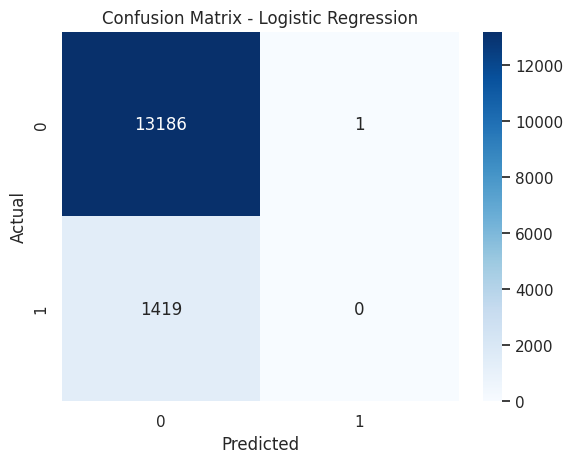


Classification Report:

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     13187
           1       0.00      0.00      0.00      1419

    accuracy                           0.90     14606
   macro avg       0.45      0.50      0.47     14606
weighted avg       0.82      0.90      0.86     14606



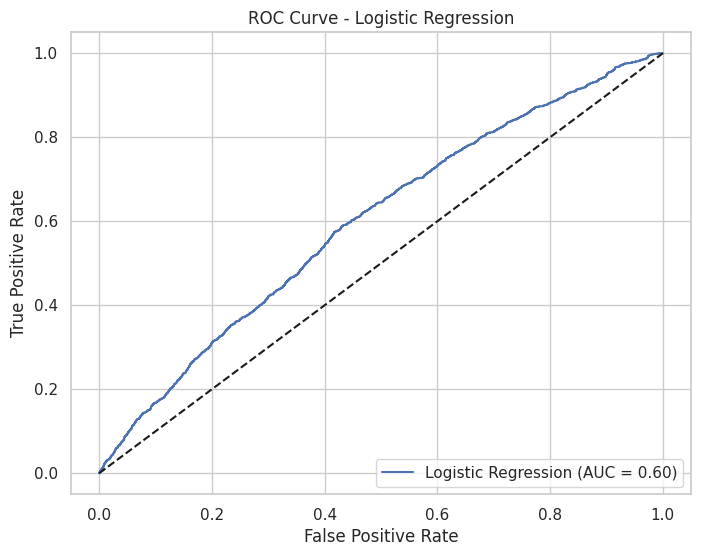

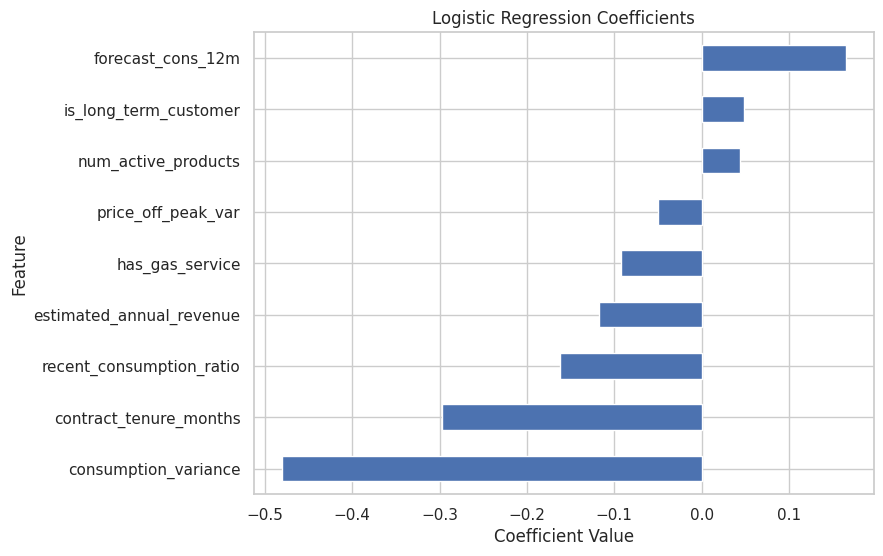

forecast_cons_12m           0.164913
is_long_term_customer       0.048614
num_active_products         0.044416
price_off_peak_var         -0.050488
has_gas_service            -0.092040
estimated_annual_revenue   -0.117590
recent_consumption_ratio   -0.162208
contract_tenure_months     -0.296633
consumption_variance       -0.480247
dtype: float64


In [11]:
# --------------------
# Logistic Regression Model (with StandardScaler)
# --------------------

# --------------------
# Cross-Validation Setup
# --------------------

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_model', LogisticRegression(max_iter=1000))
])

# Evaluate model using ROC AUC
cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='roc_auc')

print("Cross-Validation ROC AUC Scores:", cv_scores)
print("Mean ROC AUC:", round(cv_scores.mean(), 4))
print("Standard Deviation of ROC AUC:", round(cv_scores.std(), 4))

# --------------------
# Fit Final Model on Full Data for Diagnostics and Deployment
# --------------------
start_time = time.time()
pipeline.fit(X, y)
end_time = time.time()
training_time = round(end_time - start_time, 2)  # in seconds

# Generate predictions (for full dataset diagnostics)
y_pred = pipeline.predict(X)
y_proba = pipeline.predict_proba(X)[:, 1]

# --------------------
# Evaluation Metrics (Descriptive Only)
# --------------------

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc_auc = roc_auc_score(y, y_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Training time (s): {training_time}")

# Confusion Matrix
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y, y_pred))

# --------------------
# ROC Curve (Full Data Diagnostic)
# --------------------

fpr, tpr, thresholds = roc_curve(y, y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# --------------------
# Coefficients
# --------------------

log_model = pipeline.named_steps['log_model']

coefficients = pd.Series(log_model.coef_[0], index=X.columns)
coefficients = coefficients.sort_values()

plt.figure(figsize=(8, 6))
coefficients.plot(kind='barh')
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

print(coefficients.sort_values(ascending=False))

# --------------------
# Store Results
# --------------------

model_results.append({
    'Model': 'Logistic Regression',
    'CV Mean ROC AUC': cv_scores.mean(),
    'CV Std ROC AUC': cv_scores.std(),
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1': f1,
    'ROC AUC': roc_auc,
    'Training Time (s)': training_time
})

## Modeling - Logistic Regression with Class Weighting

This section develops a **Logistic Regression model with class weighting** to address class imbalance in the churn dataset. Class imbalance is a common issue in churn modeling, where non-churners significantly outnumber churners. Without correction, models may be biased toward the majority class, resulting in poor recall for churners.

---

### Modeling Process

1. **Cross-Validation Setup**  
The model is evaluated using **5-fold stratified cross-validation**, which preserves the proportion of churners and non-churners in each fold. The main evaluation metric is **ROC AUC**, which measures how well the model discriminates between the two classes across all classification thresholds.

2. **Feature Scaling**  
A `StandardScaler` standardizes all features to have zero mean and unit variance. This step is critical for logistic regression, which assumes features are on comparable scales for stable optimization.

3. **Model Training with Class Weighting**  
The Logistic Regression model includes the argument `class_weight='balanced'`, which automatically adjusts weights inversely proportional to class frequencies:
- Churners (minority) receive a higher penalty for misclassification.
- Non-churners (majority) receive a lower penalty.

This adjustment mitigates the natural bias toward the majority class in imbalanced datasets.

4. **Model Evaluation with Cross-Validation**  
- **ROC AUC scores** are calculated for each fold.
- The mean and standard deviation of the ROC AUC across folds summarize generalization performance.

5. **Full Dataset Model Fitting for Diagnostics**  
The model is refit on the **entire dataset**, not a holdout set, for diagnostic purposes, which includes:
- **Predictions (`y_pred_weighted`)** and **probabilities (`y_proba_weighted`)**.
- Calculation of descriptive performance metrics:
  - **Accuracy**  
  - **Precision**  
  - **Recall**  
  - **F1 Score**  
  - **ROC AUC**

6. **Confusion Matrix**  
A confusion matrix is generated to visualize the counts of:
- True Positives (correctly identified churners),
- True Negatives (correctly identified non-churners),
- False Positives,
- False Negatives.

7. **ROC Curve**  
An ROC curve plots the True Positive Rate against the False Positive Rate across thresholds, summarizing the model’s discrimination power via the Area Under the Curve (**AUC**).

---

### Purpose

This approach improves the model’s ability to detect churners without heavily compromising on overall accuracy. It directly balances the trade-off between:
- **Precision** (avoiding false positives) and
- **Recall** (capturing as many churners as possible).

This is particularly important in churn mitigation scenarios where the **cost of failing to identify a churner is typically higher than incorrectly flagging a non-churner**.

---

### Process Alignment

This step aligns with the following components of the project template (*Analytics CRISP DM-Template revised.docx*):
- **"Model Selection Description"**
- **"Modeling Technique"**
- **"Build Model"**
- **"Assess Model"**

It is part of the **Modeling phase in the CRISP-DM framework**, specifically focused on developing a model that appropriately handles class imbalance — a critical factor in churn prediction tasks.

---

### Textbook References

- **Chapter 5 - Predictive Modeling**, which covers the application of Logistic Regression to classification tasks and discusses methods to handle class imbalance.
- **Chapter 6 - Model Evaluation**, which provides guidance on performance assessment techniques such as cross-validation, ROC AUC, confusion matrices, and the interpretation of classification metrics.


Cross-Validation ROC AUC Scores: [0.57656916 0.60791179 0.61056899 0.56057486 0.61513836]
Mean ROC AUC: 0.5942
Standard Deviation of ROC AUC: 0.0216
Accuracy: 0.5464
Precision: 0.1255
Recall: 0.6145
F1 Score: 0.2084
ROC AUC: 0.5977
Training time (s): 0.05


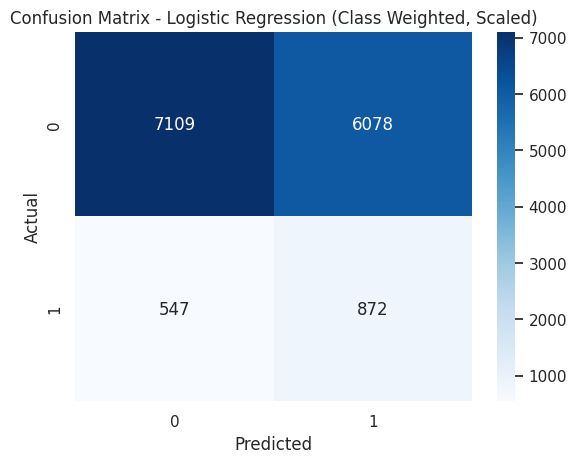


Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.54      0.68     13187
           1       0.13      0.61      0.21      1419

    accuracy                           0.55     14606
   macro avg       0.53      0.58      0.45     14606
weighted avg       0.85      0.55      0.64     14606



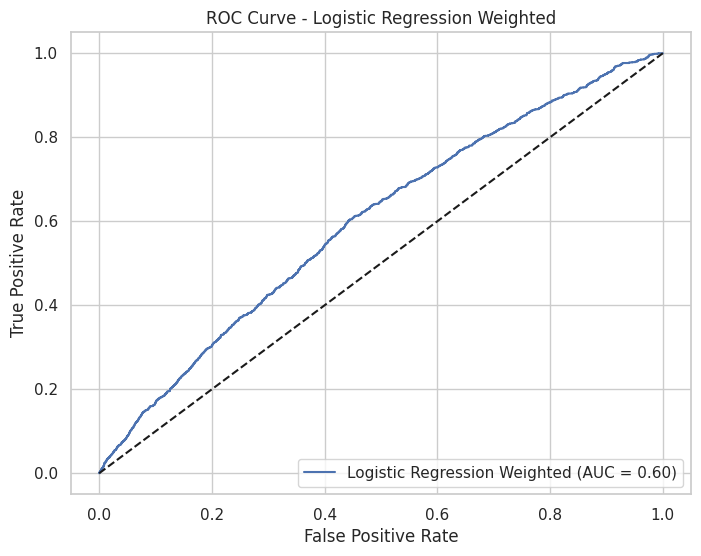

In [12]:
# --------------------
# Logistic Regression with Class Weighting (With StandardScaler and Cross-Validation)
# --------------------

# --------------------
# Cross-Validation Setup
# --------------------

pipeline_weighted = Pipeline([
    ('scaler', StandardScaler()),
    ('log_model_weighted', LogisticRegression(
        class_weight='balanced',
        max_iter=1000
    ))
])

# Evaluate model using ROC AUC
log_model_weighted = cross_val_score(
    pipeline_weighted, X, y, cv=cv, scoring='roc_auc'
)

print("Cross-Validation ROC AUC Scores:", log_model_weighted)
print("Mean ROC AUC:", round(log_model_weighted.mean(), 4))
print("Standard Deviation of ROC AUC:", round(log_model_weighted.std(), 4))

# --------------------
# Fit Final Model on Full Data for Diagnostics and Deployment
# --------------------
start_time = time.time()
pipeline_weighted.fit(X, y)
end_time = time.time()
training_time = round(end_time - start_time, 2)

# Generate predictions (for full dataset diagnostics)
y_pred_weighted = pipeline_weighted.predict(X)
y_proba_weighted = pipeline_weighted.predict_proba(X)[:, 1]

# --------------------
# Evaluation Metrics (Descriptive Only)
# --------------------

accuracy = accuracy_score(y, y_pred_weighted)
precision = precision_score(y, y_pred_weighted)
recall = recall_score(y, y_pred_weighted)
f1 = f1_score(y, y_pred_weighted)
roc_auc = roc_auc_score(y, y_proba_weighted)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Training time (s): {training_time}")

# --------------------
# Confusion Matrix
# --------------------

cm = confusion_matrix(y, y_pred_weighted)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression (Class Weighted, Scaled)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --------------------
# Classification Report
# --------------------

print("\nClassification Report:\n")
print(classification_report(y, y_pred_weighted))

# --------------------
# ROC Curve (Full Data Diagnostic)
# --------------------

fpr, tpr, thresholds = roc_curve(y, y_proba_weighted)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression Weighted (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression Weighted')
plt.legend(loc='lower right')
plt.show()

# --------------------
# Store Results
# --------------------

model_results.append({
    'Model': 'Logistic Regression (Weighted)',
    'CV Mean ROC AUC': log_model_weighted.mean(),
    'CV Std ROC AUC': log_model_weighted.std(),
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1': f1,
    'ROC AUC': roc_auc,
    'Training Time (s)': training_time
})


## Modeling - Logistic Regression with SMOTE Oversampling

This section develops a **Logistic Regression model with SMOTE (Synthetic Minority Over-sampling Technique)** to address class imbalance in the churn dataset. SMOTE balances the class distribution by generating synthetic examples of the minority class (churners) during training.

---

### Modeling Process

1. **Cross-Validation Setup with SMOTE**  
The model is evaluated using **5-fold stratified cross-validation**, ensuring that the proportion of churners is maintained in each fold.  
- SMOTE is applied **inside each fold of the cross-validation pipeline**, meaning synthetic samples are created using only the training portion within each fold, avoiding data leakage.

2. **Feature Scaling**  
A `StandardScaler` is applied as the first step in the pipeline to standardize all features to zero mean and unit variance. Scaling is performed before SMOTE because SMOTE relies on distance-based calculations to generate synthetic data.

3. **Model Training with SMOTE**  
A Logistic Regression model is trained on the SMOTE-balanced training data within each fold. The pipeline includes both scaling and SMOTE.

4. **Model Evaluation with Cross-Validation**  
- **ROC AUC scores** are calculated for each fold.
- The mean and standard deviation of the ROC AUC across folds summarize the model's generalization performance.

5. **Full Dataset Model Fitting for Diagnostics**  
The pipeline is refit on the **entire dataset** (including applying SMOTE on the full dataset) for diagnostic purposes, including:
- **Predictions (`y_pred_smote`)** and **probabilities (`y_pred_proba_smote`)**.
- Descriptive performance metrics:
  - **Accuracy**  
  - **Precision**  
  - **Recall**  
  - **F1 Score**  
  - **ROC AUC**

6. **Confusion Matrix**  
A confusion matrix is generated to display the counts of:
- True Positives (correctly identified churners),
- True Negatives (correctly identified non-churners),
- False Positives,
- False Negatives.

7. **ROC Curve**  
An ROC curve visualizes the trade-off between true positive rate and false positive rate across various thresholds. The **AUC (Area Under the Curve)** summarizes the model's discriminative ability.

---

### Purpose

The use of SMOTE in this context aims to improve the model’s ability to detect churners by synthetically augmenting the minority class. This approach helps mitigate the bias toward the majority class that is typical in imbalanced datasets like churn.

---

### Process Alignment

This modeling step aligns with the following components of the project template (*Analytics CRISP DM-Template revised.docx*):
- **"Model Selection Description"**
- **"Modeling Technique"**
- **"Build Model"**
- **"Assess Model"**

It is part of the **Modeling phase of the CRISP-DM framework**, specifically addressing the challenge of class imbalance through synthetic data generation within the cross-validation process.

---

### Textbook References

- **Chapter 5 - Predictive Modeling**, which discusses classification techniques and strategies for handling class imbalance.
- **Chapter 6 - Model Evaluation**, which covers performance assessment techniques like cross-validation, ROC AUC, confusion matrices, and the interpretation of classification metrics.

The use of SMOTE reflects standard practice for addressing imbalanced datasets, complementing the textbook's recommendations on model preparation and evaluation.


Cross-Validation ROC AUC Scores: [0.57813618 0.60456157 0.60797187 0.56292495 0.61442039]
Mean ROC AUC: 0.5936
Standard Deviation of ROC AUC: 0.0197
Accuracy: 0.5283
Precision: 0.1234
Recall: 0.6314
F1 Score: 0.2064
ROC AUC: 0.5969
Training time (s): 0.08


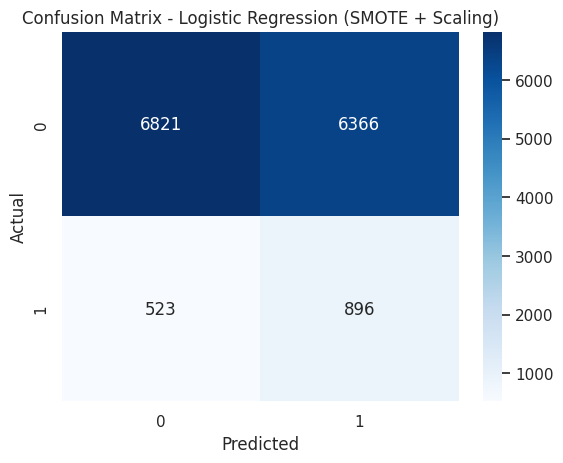


Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.52      0.66     13187
           1       0.12      0.63      0.21      1419

    accuracy                           0.53     14606
   macro avg       0.53      0.57      0.44     14606
weighted avg       0.85      0.53      0.62     14606



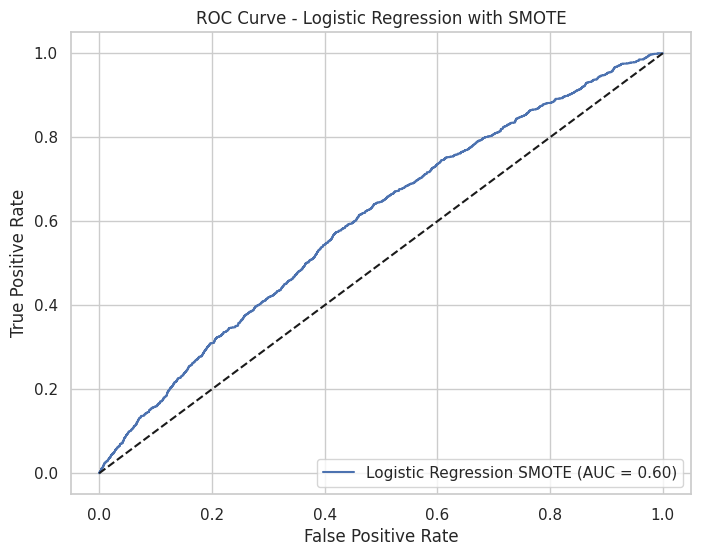

In [13]:
# --------------------
# Logistic Regression with SMOTE Oversampling (With StandardScaler and Cross-Validation)
# --------------------

# --------------------
# Cross-Validation Setup
# --------------------

pipeline_smote = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('log_model_smote', LogisticRegression(max_iter=1000))
])

# Evaluate model using ROC AUC
log_model_smote = cross_val_score(
    pipeline_smote, X, y, cv=cv, scoring='roc_auc'
)

print("Cross-Validation ROC AUC Scores:", log_model_smote)
print("Mean ROC AUC:", round(log_model_smote.mean(), 4))
print("Standard Deviation of ROC AUC:", round(log_model_smote.std(), 4))

# --------------------
# Fit Final Model on Full Data for Diagnostics and Deployment
# --------------------
start_time = time.time()
pipeline_smote.fit(X, y)
end_time = time.time()

training_time = round(end_time - start_time, 2)
# Generate predictions (for full dataset diagnostics)
y_pred_smote = pipeline_smote.predict(X)
y_pred_proba_smote = pipeline_smote.predict_proba(X)[:, 1]

# --------------------
# Evaluation Metrics (Descriptive Only)
# --------------------

accuracy = accuracy_score(y, y_pred_smote)
precision = precision_score(y, y_pred_smote)
recall = recall_score(y, y_pred_smote)
f1 = f1_score(y, y_pred_smote)
roc_auc = roc_auc_score(y, y_pred_proba_smote)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Training time (s): {training_time}")

# --------------------
# Confusion Matrix
# --------------------

cm = confusion_matrix(y, y_pred_smote)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression (SMOTE + Scaling)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --------------------
# Classification Report
# --------------------

print("\nClassification Report:\n")
print(classification_report(y, y_pred_smote))

# --------------------
# ROC Curve (Full Data Diagnostic)
# --------------------

fpr, tpr, thresholds = roc_curve(y, y_pred_proba_smote)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression SMOTE (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression with SMOTE')
plt.legend(loc='lower right')
plt.show()

# --------------------
# Store Results
# --------------------

model_results.append({
    'Model': 'Logistic Regression (SMOTE)',
    'CV Mean ROC AUC': log_model_smote.mean(),
    'CV Std ROC AUC': log_model_smote.std(),
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1': f1,
    'ROC AUC': roc_auc,
    'Training Time (s)': training_time
})


## Modeling - Decision Tree Classifier

This section develops a **Decision Tree model** to predict customer churn. Decision Trees are non-parametric models that split the data into segments based on rules derived from feature values. They are highly interpretable and capable of capturing non-linear relationships.

---

### Modeling Process

1. **Cross-Validation Setup**  
The model is evaluated using **5-fold stratified cross-validation**, which maintains the churn/non-churn distribution in each fold. The main evaluation metric is **ROC AUC**, which measures the model’s ability to discriminate between churners and non-churners across thresholds.

2. **Model Configuration and Training**  
The Decision Tree Classifier is configured with:
- `class_weight='balanced'` to account for class imbalance by assigning higher weight to churners.
- `max_depth=5` to limit the maximum depth of the tree, reducing overfitting.
- `min_samples_leaf=20` to ensure that each leaf node contains at least 20 observations, enhancing model generalization.

| Component | Purpose | What it affects |
| --- | --- | --- |
| **`StandardScaler()`** | Standardizes feature scales (mean=0, std=1) | **Feature magnitudes.** Helps algorithms converge and compute distances/similarities correctly.    |
| **`class_weight='balanced'`** | Adjusts model training to account for **class imbalance** | **The loss function during training.** Prevents bias toward the majority class (e.g., "no churn"). |


3. **Model Evaluation with Cross-Validation**  
- ROC AUC is computed for each fold.
- The mean and standard deviation of ROC AUC across folds summarize model performance.

4. **Full Dataset Model Fitting for Diagnostics**  
The model is fit on the **entire dataset** to enable:
- Generation of predictions (`y_pred_dt`) and probabilities (`y_pred_proba_dt`).
- Calculation of descriptive performance metrics:
  - **Accuracy**  
  - **Precision**  
  - **Recall**  
  - **F1 Score**  
  - **ROC AUC**

5. **Confusion Matrix**  
The confusion matrix visualizes true positives, true negatives, false positives, and false negatives, providing insight into prediction errors.

6. **ROC Curve**  
An ROC curve visualizes the trade-off between true positive rate and false positive rate, with **AUC** summarizing the model’s discriminative ability.

7. **Model Interpretation**  
- **Feature Importance:** Quantifies the contribution of each feature to the tree’s predictions.
- **Tree Visualization:** The complete decision tree is plotted, showing decision rules at each node, which enhances transparency and stakeholder interpretability.

---

### Purpose

This Decision Tree model provides an interpretable framework for understanding churn risk. Its ability to capture non-linear relationships complements linear models such as Logistic Regression.

---

### Process Alignment

This step aligns with the following components of the project template (*Analytics CRISP DM-Template revised.docx*):
- **"Model Selection Description"**
- **"Modeling Technique"**
- **"Build Model"**
- **"Assess Model"**

It is part of the **Modeling phase of the CRISP-DM framework**, focused on constructing a decision tree model that balances predictive accuracy with interpretability while addressing class imbalance.

---

### Textbook References

- **Chapter 5 - Predictive Modeling**, which covers Decision Trees as a supervised learning technique, including strategies for controlling complexity (e.g., limiting tree depth and minimum leaf size).
- **Chapter 6 - Model Evaluation**, which discusses cross-validation, ROC AUC, confusion matrices, and how to interpret model performance.


Cross-Validation ROC AUC Scores: [0.57188077 0.58310834 0.5810233  0.5795131  0.59735732]
Mean ROC AUC: 0.5826
Standard Deviation of ROC AUC: 0.0083
Accuracy: 0.5705
Precision: 0.1277
Recall: 0.5870
F1 Score: 0.2098
ROC AUC: 0.6176
Training time (s): 0.06


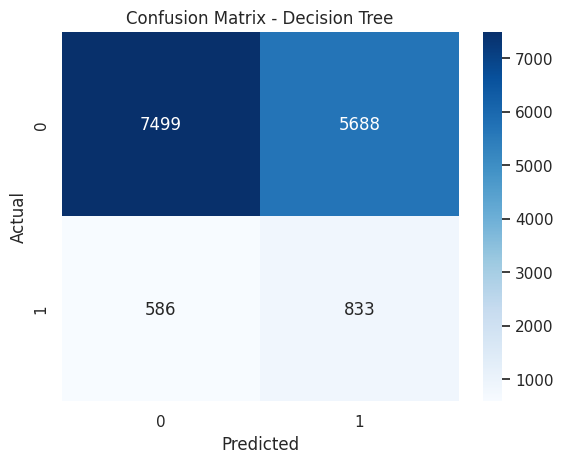


Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.57      0.71     13187
           1       0.13      0.59      0.21      1419

    accuracy                           0.57     14606
   macro avg       0.53      0.58      0.46     14606
weighted avg       0.85      0.57      0.66     14606



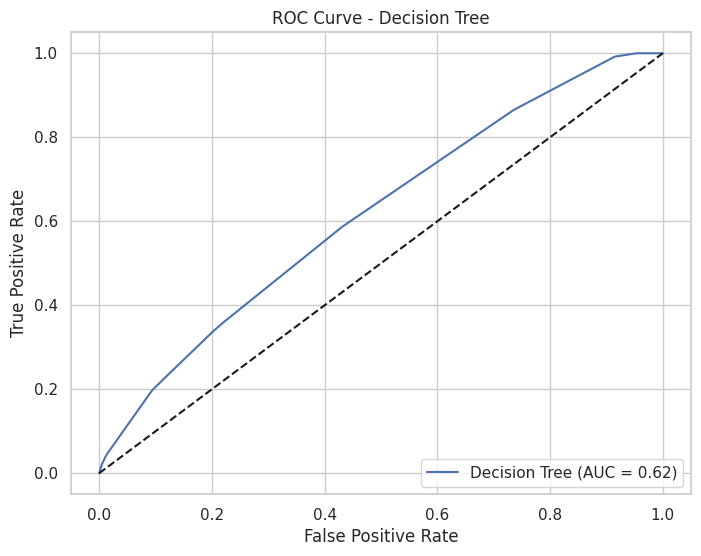

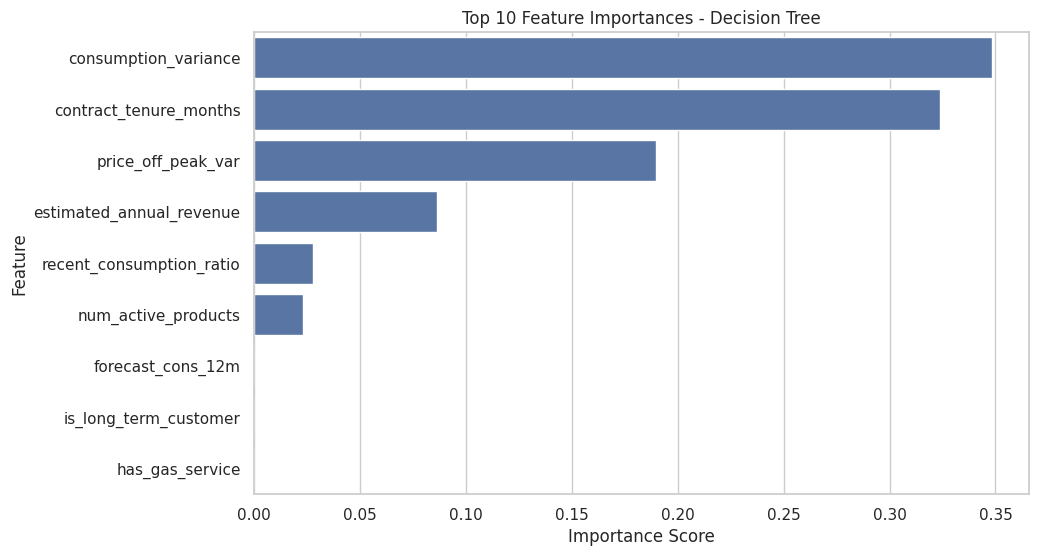

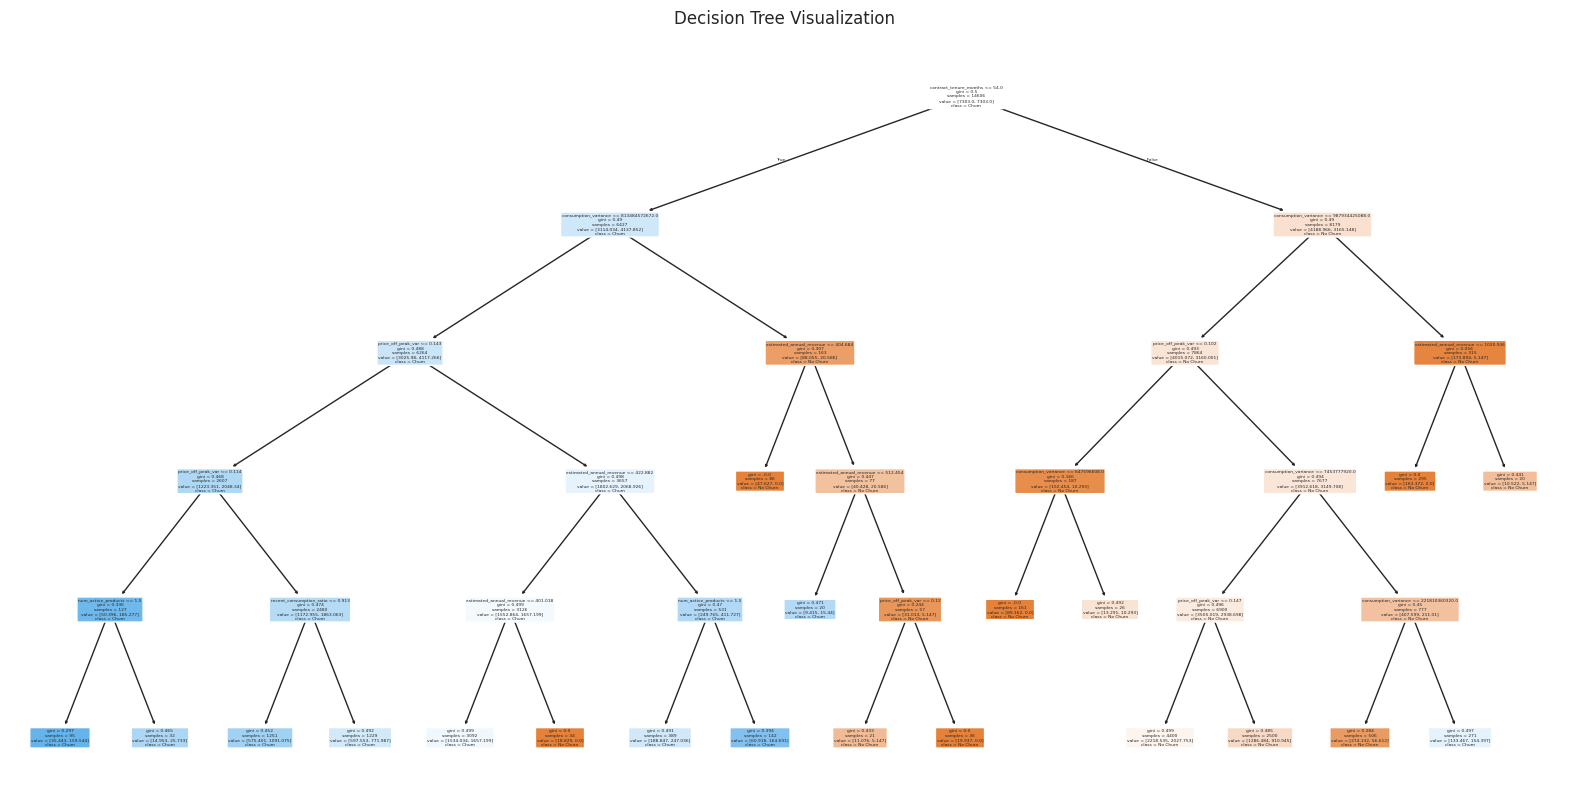

In [14]:
# --------------------
# Decision Tree Model (With Cross-Validation)
# --------------------

# --------------------
# Cross-Validation Setup
# --------------------

dt_model = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced',
    max_depth=5,
    min_samples_leaf=20
)

# Evaluate model using ROC AUC
cv_scores_dt = cross_val_score(
    dt_model, X, y, cv=cv, scoring='roc_auc'
)

print("Cross-Validation ROC AUC Scores:", cv_scores_dt)
print("Mean ROC AUC:", round(cv_scores_dt.mean(), 4))
print("Standard Deviation of ROC AUC:", round(cv_scores_dt.std(), 4))

# --------------------
# Fit Final Model on Full Data for Diagnostics and Deployment
# --------------------
start_time = time.time()
dt_model.fit(X, y)
end_time = time.time()
training_time = round(end_time - start_time, 2)

# Generate predictions (for full dataset diagnostics)
y_pred_dt = dt_model.predict(X)
y_pred_proba_dt = dt_model.predict_proba(X)[:, 1]

# --------------------
# Evaluation Metrics (Descriptive Only)
# --------------------

accuracy = accuracy_score(y, y_pred_dt)
precision = precision_score(y, y_pred_dt)
recall = recall_score(y, y_pred_dt)
f1 = f1_score(y, y_pred_dt)
roc_auc = roc_auc_score(y, y_pred_proba_dt)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Training time (s): {training_time}")

# --------------------
# Confusion Matrix
# --------------------

cm = confusion_matrix(y, y_pred_dt)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --------------------
# Classification Report
# --------------------

print("\nClassification Report:\n")
print(classification_report(y, y_pred_dt))

# --------------------
# ROC Curve (Full Data Diagnostic)
# --------------------

fpr, tpr, thresholds = roc_curve(y, y_pred_proba_dt)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.show()

# --------------------
# Feature Importance
# --------------------

importances = pd.Series(
    dt_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances.head(10), y=importances.head(10).index)
plt.title("Top 10 Feature Importances - Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# --------------------
# Plot the Decision Tree
# --------------------

plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=['No Churn', 'Churn'],
    filled=True,
    rounded=True
)
plt.title("Decision Tree Visualization")
plt.show()

# --------------------
# Store Results
# --------------------

model_results.append({
    'Model': 'Decision Tree',
    'CV Mean ROC AUC': cv_scores_dt.mean(),
    'CV Std ROC AUC': cv_scores_dt.std(),
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1': f1,
    'ROC AUC': roc_auc,
    'Training Time (s)': training_time
})


## Modeling - Random Forest Classifier

This section develops a **Random Forest model** to predict customer churn. Random Forest is an ensemble learning technique that builds multiple decision trees and combines their outputs to improve predictive accuracy and control overfitting compared to a single decision tree.

---

### Modeling Process

1. **Cross-Validation Setup**  
The model is evaluated using **5-fold stratified cross-validation**, preserving the class distribution of churn and non-churn in each fold. The primary evaluation metric is **ROC AUC**, which measures how well the model discriminates between churners and non-churners.

2. **Model Configuration and Training**  
The Random Forest model is configured with:
- **`n_estimators=100`**: Builds 100 decision trees in the ensemble.
- **`max_depth=7`**: Limits the depth of each tree to reduce overfitting.
- **`min_samples_leaf=20`**: Requires each terminal leaf node to have at least 20 samples for stability.
- **`class_weight='balanced'`**: Adjusts for class imbalance by giving more weight to churners.
- **`random_state=42`**: Ensures reproducibility of results.

3. **Model Evaluation with Cross-Validation**  
- ROC AUC is computed for each fold.
- The mean and standard deviation of ROC AUC across folds summarize generalization performance.

4. **Full Dataset Model Fitting for Diagnostics**  
The Random Forest is then fitted on the **entire dataset** (without a separate test set) to:
- Generate predictions (`y_pred_rf`) and predicted probabilities (`y_pred_proba_rf`).
- Calculate descriptive performance metrics:
  - **Accuracy**  
  - **Precision**  
  - **Recall**  
  - **F1 Score**  
  - **ROC AUC**

5. **Confusion Matrix**  
The confusion matrix provides a detailed breakdown of:
- True Positives (correctly predicted churners),
- True Negatives (correctly predicted non-churners),
- False Positives,
- False Negatives.

6. **ROC Curve**  
An ROC curve visualizes the trade-off between true positive rate and false positive rate across different thresholds, with **AUC** summarizing overall performance.

7. **Model Interpretation**  
- **Feature Importance:** Measures how much each feature contributes to the model’s predictions.
- **Cumulative Feature Importance:** Displays the cumulative contribution of the most important features, which aids in assessing whether the model’s complexity can be reduced without sacrificing accuracy.

---

### Purpose

This Random Forest model provides a powerful, robust approach to churn prediction by capturing complex, non-linear interactions between features while also handling class imbalance. It complements simpler models like Logistic Regression and more interpretable models like Decision Trees.

---

### Process Alignment

This step aligns with the following sections of the project template (*Analytics CRISP DM-Template revised.docx*):
- **"Model Selection Description"**
- **"Modeling Technique"**
- **"Build Model"**
- **"Assess Model"**

It is part of the **Modeling phase of the CRISP-DM framework**, focusing on building a robust ensemble model, evaluating its performance, and interpreting its drivers of churn.

---

### Textbook References

- **Chapter 5 - Predictive Modeling**, which includes Random Forest as an ensemble classification technique. The chapter discusses how Random Forest improves stability and predictive power compared to single-tree models.
- **Chapter 6 - Model Evaluation**, which covers cross-validation, ROC AUC, confusion matrices, and performance interpretation.


Cross-Validation ROC AUC Scores: [0.61706879 0.60697576 0.61755917 0.59810618 0.60756355]
Mean ROC AUC: 0.6095
Standard Deviation of ROC AUC: 0.0072
Accuracy: 0.6611
Precision: 0.1688
Recall: 0.6342
F1 Score: 0.2667
ROC AUC: 0.7164
Training time (s): 1.92


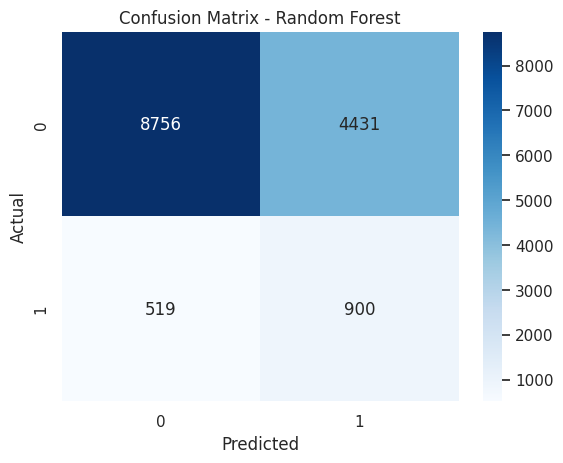


Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.66      0.78     13187
           1       0.17      0.63      0.27      1419

    accuracy                           0.66     14606
   macro avg       0.56      0.65      0.52     14606
weighted avg       0.87      0.66      0.73     14606



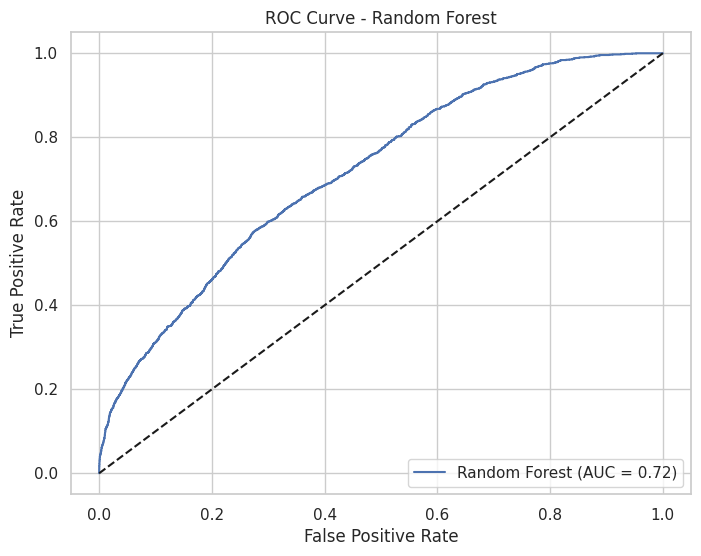

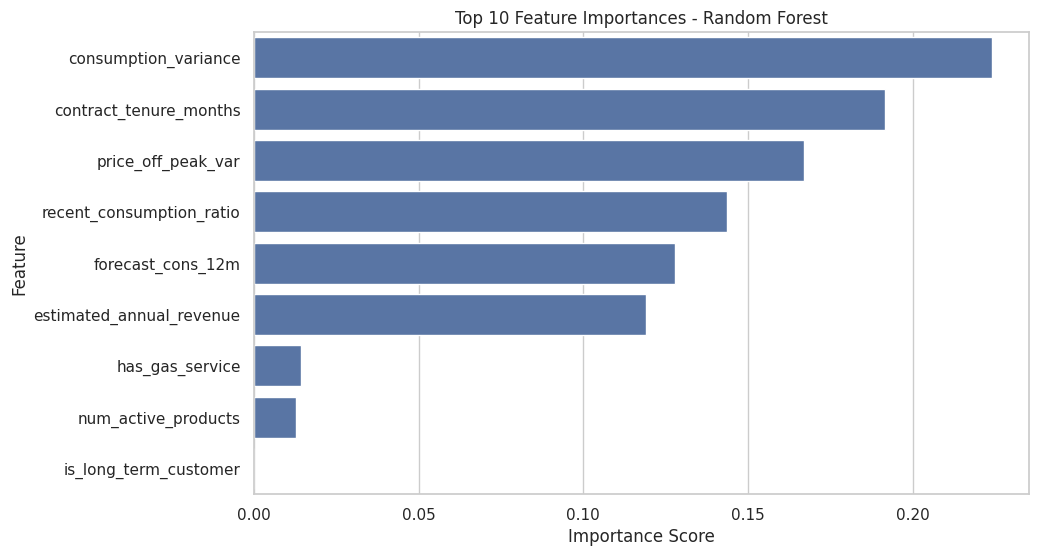

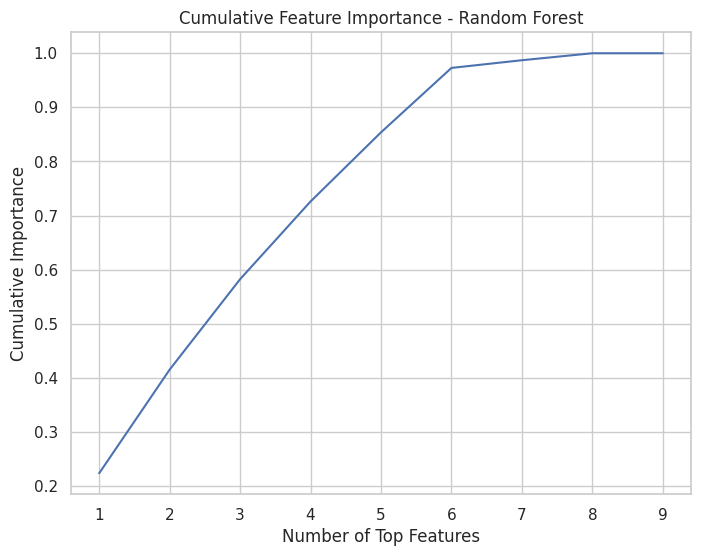

In [15]:
# --------------------
# Random Forest Model (With Cross-Validation)
# --------------------

# --------------------
# Cross-Validation Setup
# --------------------

rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=7,
    min_samples_leaf=20,
    class_weight='balanced',
    random_state=42
)

# Evaluate model using ROC AUC
cv_scores_rf = cross_val_score(
    rf_model, X, y, cv=cv, scoring='roc_auc'
)

print("Cross-Validation ROC AUC Scores:", cv_scores_rf)
print("Mean ROC AUC:", round(cv_scores_rf.mean(), 4))
print("Standard Deviation of ROC AUC:", round(cv_scores_rf.std(), 4))

# --------------------
# Fit Final Model on Full Data for Diagnostics and Deployment
# --------------------
start_time = time.time()
rf_model.fit(X, y)
end_time = time.time()
training_time = round(end_time - start_time, 2)

# Generate predictions (for full dataset diagnostics)
y_pred_rf = rf_model.predict(X)
y_pred_proba_rf = rf_model.predict_proba(X)[:, 1]

# --------------------
# Evaluation Metrics (Descriptive Only)
# --------------------

accuracy = accuracy_score(y, y_pred_rf)
precision = precision_score(y, y_pred_rf)
recall = recall_score(y, y_pred_rf)
f1 = f1_score(y, y_pred_rf)
roc_auc = roc_auc_score(y, y_pred_proba_rf)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Training time (s): {training_time}")

# --------------------
# Confusion Matrix
# --------------------

cm = confusion_matrix(y, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --------------------
# Classification Report
# --------------------

print("\nClassification Report:\n")
print(classification_report(y, y_pred_rf))

# --------------------
# ROC Curve (Full Data Diagnostic)
# --------------------

fpr, tpr, thresholds = roc_curve(y, y_pred_proba_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

# --------------------
# Feature Importance
# --------------------

importances = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances.head(10), y=importances.head(10).index)
plt.title("Top 10 Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# --------------------
# Cumulative Feature Importance
# --------------------

cumulative_importance = importances.cumsum()

plt.figure(figsize=(8, 6))
sns.lineplot(
    x=range(1, len(cumulative_importance) + 1),
    y=cumulative_importance.values
)
plt.title("Cumulative Feature Importance - Random Forest")
plt.xlabel("Number of Top Features")
plt.ylabel("Cumulative Importance")
plt.grid(True)
plt.show()

# --------------------
# Store Results
# --------------------

model_results.append({
    'Model': 'Random Forest',
    'CV Mean ROC AUC': cv_scores_rf.mean(),
    'CV Std ROC AUC': cv_scores_rf.std(),
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1': f1,
    'ROC AUC': roc_auc,
    'Training Time (s)': training_time
})


## Modeling - Multi-Layer Perceptron (MLP) Classifier

This section develops a **Multi-Layer Perceptron (MLP)** model, a type of feedforward artificial neural network (ANN), for predicting customer churn.

---

### Modeling Process

1. **Data Preprocessing:**
   - Features are scaled using `StandardScaler` to improve the convergence and performance of the neural network.
   - Neural networks are sensitive to feature scale; hence, scaling is essential.

2. **Model Configuration:**
   - The MLP consists of:
     - Two hidden layers with **50 and 25 neurons** respectively.
     - **ReLU activation function** for non-linearity.
     - **Adam optimizer** for efficient training.
     - Maximum iterations set to **500** to ensure convergence.
   - A fixed random seed (`random_state=42`) ensures reproducibility.

3. **Cross-Validation:**
   - Model performance is evaluated using **5-fold stratified cross-validation** based on **ROC AUC**, providing an unbiased estimate of model performance.

4. **Performance Metrics:**
   - Evaluated using:
     - **Accuracy**
     - **Precision**
     - **Recall**
     - **F1 Score**
     - **ROC AUC**
   - Confusion matrix and ROC curve are generated for visual assessment.

---

### Rationale for Using MLP

- MLP can capture **non-linear relationships** between features and churn likelihood, which linear models like Logistic Regression cannot.
- Compared to tree-based models (e.g., Random Forest), MLP may uncover different types of interactions between variables.
- It provides an additional model type to compare against classical machine learning models.

---

### Considerations and Limitations

- **Interpretability:**  
  Neural networks are often less interpretable than Logistic Regression or Decision Trees.

- **Training Requirements:**  
  MLP requires feature scaling and more computational resources compared to simpler models.

- **Hyperparameter Sensitivity:**  
  Performance can depend on the choice of network architecture (number of layers, neurons) and solver settings.

---

### Process Alignment

This model development aligns with the **Modeling phase of the CRISP-DM framework**, specifically:
- **Model Selection**
- **Model Assessment**
- **Comparative Evaluation**

It complements the previously developed models (Logistic Regression, Decision Tree, Random Forest) by providing a **non-linear machine learning alternative**.

---

### Textbook References

- **Chapter 5 - Modeling:**  
Discusses machine learning techniques including neural networks as extensions to classical models.
- **Chapter 6 - Model Evaluation:**  
Covers how to evaluate models using metrics such as ROC AUC and precision-recall trade-offs.

---

Cross-Validation ROC AUC Scores: [0.5831082  0.57526559 0.60066924 0.58858498 0.59261889]
Mean ROC AUC: 0.588
Standard Deviation of ROC AUC: 0.0086
Accuracy: 0.9028
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC AUC: 0.6320
Training time (s): 3.29


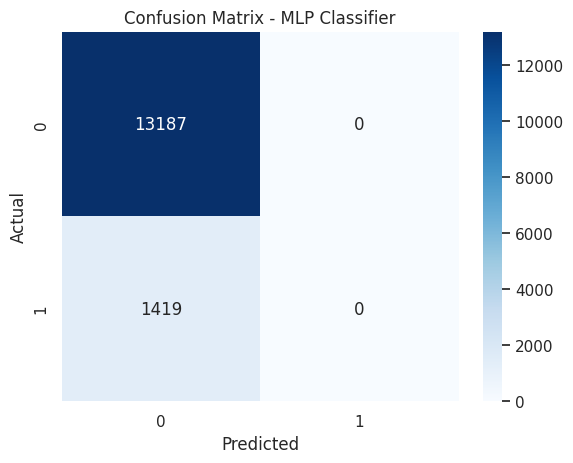

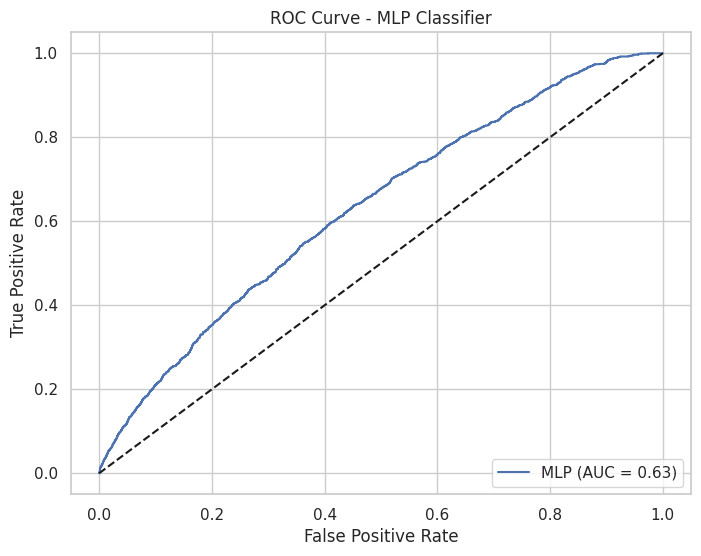


Classification Report:

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     13187
           1       0.00      0.00      0.00      1419

    accuracy                           0.90     14606
   macro avg       0.45      0.50      0.47     14606
weighted avg       0.82      0.90      0.86     14606



In [16]:
# -------------------------------
# MLP Classifier (Neural Network) with Cross-Validation
# -------------------------------


# -------------------------------
# Cross-Validation Setup
# -------------------------------

pipeline_mlp = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp_model', MLPClassifier(
        hidden_layer_sizes=(50, 25),
        activation='relu',
        solver='adam',
        max_iter=500,
        random_state=42
    ))
])

# Evaluate using ROC AUC
cv_scores_mlp = cross_val_score(
    pipeline_mlp, X, y, cv=cv, scoring='roc_auc'
)

print("Cross-Validation ROC AUC Scores:", cv_scores_mlp)
print("Mean ROC AUC:", round(cv_scores_mlp.mean(), 4))
print("Standard Deviation of ROC AUC:", round(cv_scores_mlp.std(), 4))

# -------------------------------
# Fit Final Model on Full Data
# -------------------------------
start_time = time.time()
pipeline_mlp.fit(X, y)
end_time = time.time()
training_time = round(end_time - start_time, 2)

# Generate predictions (for full dataset diagnostics)
y_pred_mlp = pipeline_mlp.predict(X)
y_proba_mlp = pipeline_mlp.predict_proba(X)[:, 1]

# -------------------------------
# Evaluation Metrics
# -------------------------------

accuracy = accuracy_score(y, y_pred_mlp)
precision = precision_score(y, y_pred_mlp)
recall = recall_score(y, y_pred_mlp)
f1 = f1_score(y, y_pred_mlp)
roc_auc = roc_auc_score(y, y_proba_mlp)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print(f"Training time (s): {training_time}")

# Confusion Matrix
cm = confusion_matrix(y, y_pred_mlp)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - MLP Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y, y_proba_mlp)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'MLP (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - MLP Classifier')
plt.legend(loc='lower right')
plt.show()

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y, y_pred_mlp))

# -------------------------------
# Store Results
# -------------------------------

model_results.append({
    'Model': 'MLP Classifier',
    'CV Mean ROC AUC': cv_scores_mlp.mean(),
    'CV Std ROC AUC': cv_scores_mlp.std(),
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1': f1,
    'ROC AUC': roc_auc,
    'Training Time (s)': training_time
})


# Results

## Model Comparison, Scoring, and Selection Using ROC AUC

This section compares the predictive models developed in earlier steps and selects the best-performing model based on the **ROC AUC (Receiver Operating Characteristic - Area Under the Curve)** metric.

---

### Model Comparison Process

1. **Performance Metric:**  
Model performance is evaluated exclusively using **ROC AUC**, which summarizes each model’s ability to discriminate between churners and non-churners across all probability thresholds.

2. **Comparison Approach:**  
- A results dataframe (`results_df`) is created containing the performance metrics from each model.
- Models are ranked based on their **cross-validated ROC AUC scores**, with the highest ROC AUC determining the best-performing model.
- A bar chart visually compares the models based on ROC AUC.

3. **Model Selection:**  
- The model with the highest ROC AUC is programmatically selected from the sorted results.
- This selected model is then used to generate churn probability scores for the **entire dataset** (`X`), not a holdout or test set.

4. **Scoring the Dataset:**  
- The selected model predicts the probability of churn for each customer.
- A scoring output is generated, containing:
  - **Customer ID**
  - **Predicted churn probability**

- Customers are ranked from highest to lowest churn probability to identify those at greatest risk.

---

### Why ROC AUC is Used for Model Selection

- **Threshold-Independent:**  
ROC AUC measures the model’s ranking ability without requiring a specific classification threshold.

- **Appropriate for Imbalanced Data:**  
ROC AUC is not biased by the imbalance between churners and non-churners, which is inherent in the dataset.

- **Alignment with Business Objectives:**  
The business goal is to **rank customers by churn risk**, not necessarily to classify them as churners or non-churners at this stage. This ranking informs targeted retention campaigns.

---

### Metrics Not Used for Model Selection

- **Accuracy:**  
Not reliable in imbalanced datasets, as predicting "no churn" for every customer would achieve high accuracy but zero value.

- **Precision, Recall, and F1 Score:**  
These are **threshold-dependent metrics**. They are relevant during threshold selection and deployment phases but are not used for comparing overall model quality across probability thresholds.

---

### Important Clarifications on the Workflow

- This process does **not use a train/test split**. All models are evaluated using **5-fold stratified cross-validation**, ensuring that churn distribution is preserved in each fold.

- There is **no threshold tuning or deployment threshold setting in this step**. The focus is purely on selecting the model with the best ranking ability.

- After model selection, the chosen model is fit on the **entire dataset** to produce churn probability scores for all customers.

---

### Process Alignment

This step corresponds to the following components of the project template (*Analytics CRISP DM-Template revised.docx*):
- **"Model Assessment"**
- **"Model Selection Description"**
- **"Assess Model"**
- **"Score Data"**

It aligns with the **Modeling phase of the CRISP-DM framework**, focusing on evaluating models, selecting the best-performing one, and generating probability scores for the customer base.

---

### Textbook References

- **Chapter 6 - Model Evaluation**, which recommends ROC AUC for evaluating classification models, particularly in imbalanced settings.
- **Chapter 5 - Predictive Modeling**, which emphasizes the use of cross-validation and comparison of alternative models based on reliable performance metrics.


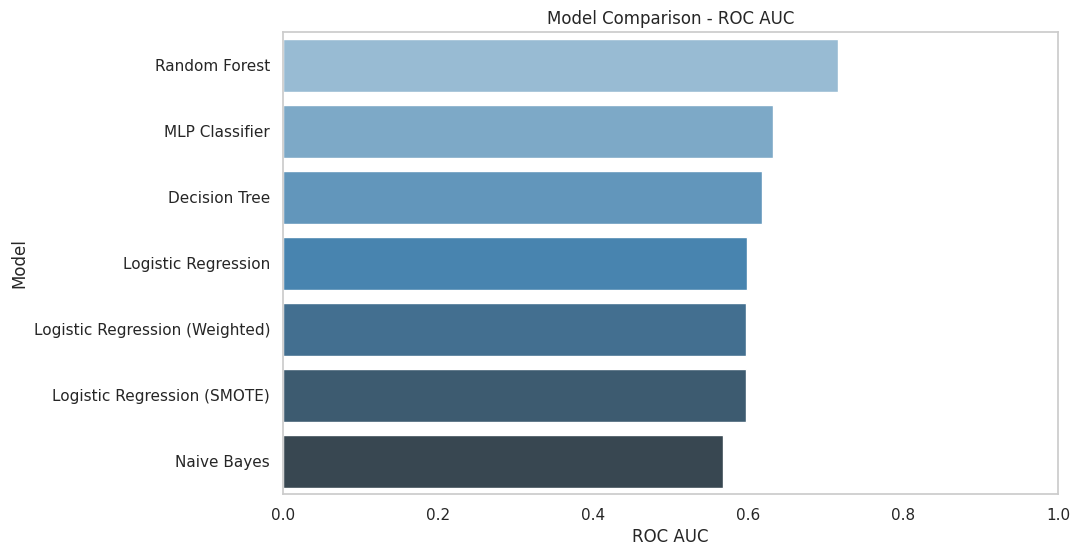

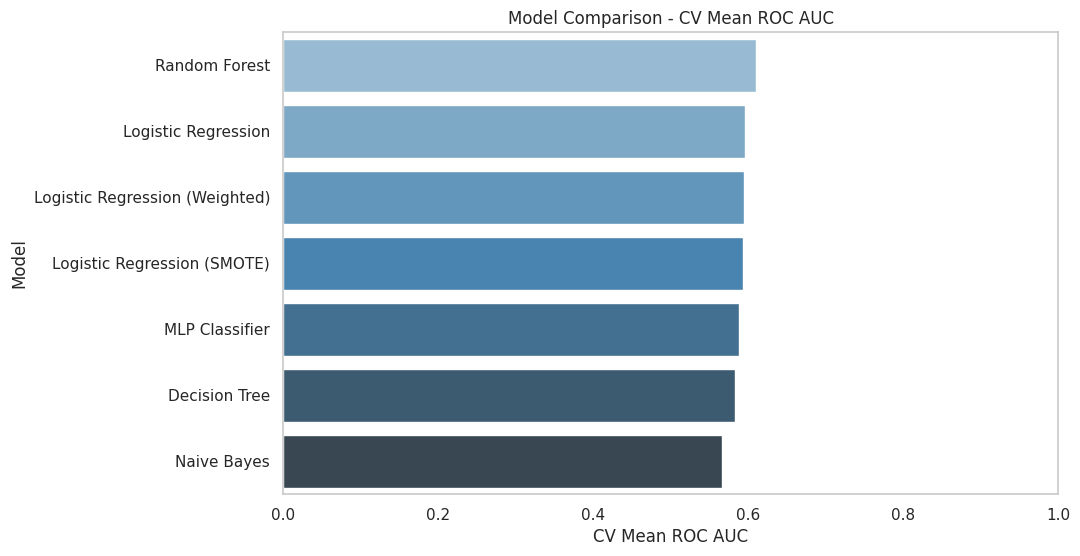

,Model,CV Mean ROC AUC,CV Std ROC AUC,Accuracy,Precision,Recall,F1,ROC AUC,Training Time (s)
5,Random Forest,0.609455,0.007241,0.661098,0.168824,0.634249,0.266667,0.716416,1.92
1,Logistic Regression,0.595485,0.019381,0.902780,0.000000,0.000000,0.000000,0.597986,0.03
2,Logistic Regression (Weighted),0.594153,0.021614,0.546419,0.125468,0.614517,0.208388,0.597684,0.05
3,Logistic Regression (SMOTE),0.593603,0.019699,0.528345,0.123382,0.631431,0.206428,0.596866,0.08
6,MLP Classifier,0.588049,0.008582,0.902848,0.000000,0.000000,0.000000,0.632034,3.29
4,Decision Tree,0.582577,0.008306,0.570450,0.127741,0.587033,0.209824,0.617611,0.06
0,Naive Bayes,0.566652,0.013332,0.123100,0.099289,0.994362,0.180550,0.567519,0.01


Best model selected based on CV Mean ROC AUC: Random Forest
Top 10 customers most at risk of churn:


,id,Churn_Probability
0,65cb91b93ad5b39b874e5defd8f96952,0.758601
1,bb8201b3065bc1f08b881a59e2a7feca,0.751815
2,48cfc269f12b3ab04b09a2ffff2f6d22,0.751815
3,075ded2164a5dbaa0a5791ad9f7018f8,0.751815
4,faf60d1008a80d7e557d762a3988860c,0.748925
5,ed050009229e0ae62d319ea54c31251d,0.748925
6,f8a228fe22a971a987fa8ee47615fc70,0.748925
7,782d072e7b10d8447b4f8b2dd23cab7c,0.738408
8,80d5382bbd1bd1755a3c00e65bfb2199,0.738408
9,f6069905f61b9357bf9f389dbd6e767b,0.738408


In [17]:
# -------------------------------
# Model Comparison, Scoring, Threshold Flagging, Plotting
# -------------------------------
results_df = pd.DataFrame(model_results)
# -------------------------------
# Plot Model Performance Comparison
# -------------------------------

plt.figure(figsize=(10, 6))

results_sorted = results_df.sort_values(by='ROC AUC', ascending=False)
sns.barplot(x='ROC AUC', y='Model', data=results_sorted, palette="Blues_d")
plt.title('Model Comparison - ROC AUC')
plt.xlabel('ROC AUC')
plt.ylabel('Model')
plt.xlim(0.0, 1.0)
plt.grid(axis='x')
plt.show()

plt.figure(figsize=(10, 6))
results_sorted = results_df.sort_values(by='CV Mean ROC AUC', ascending=False)
sns.barplot(x='CV Mean ROC AUC', y='Model', data=results_sorted, palette="Blues_d")
plt.title('Model Comparison - CV Mean ROC AUC')
plt.xlabel('CV Mean ROC AUC')
plt.ylabel('Model')
plt.xlim(0.0, 1.0)
plt.grid(axis='x')
plt.show()

display(results_sorted)

# -------------------------------
# Select the Best Model
# -------------------------------

best_model_name = results_sorted.iloc[0]['Model']
print(f"Best model selected based on CV Mean ROC AUC: {best_model_name}")

if best_model_name == 'Random Forest':
    best_model = rf_model
elif best_model_name == 'Decision Tree':
    best_model = dt_model
elif best_model_name == 'Logistic Regression':
    best_model = log_model
elif best_model_name == 'Logistic Regression (Weighted)':
    best_model = log_model_weighted
elif best_model_name == 'Logistic Regression (SMOTE)':
    best_model = log_model_smote
elif best_model_name == 'Naive Bayes':
    best_model = nb_model
elif best_model_name == 'MLP Classifier':
    best_model = pipeline_mlp
else:
    raise ValueError("Unknown model name")

# -------------------------------
# Score the Full Dataset
# -------------------------------

churn_probabilities = best_model.predict_proba(X)[:, 1]  # if using train/test split use X_test

scoring_output = pd.DataFrame({
    'id': customer_ids, #if using train/test split use X_test.index
    'Churn_Probability': churn_probabilities
})

scoring_output_sorted = scoring_output.sort_values(
    by='Churn_Probability', ascending=False
).reset_index(drop=True)

print("Top 10 customers most at risk of churn:")
display(scoring_output_sorted.head(10))




## Precision, Recall, and F1 Score vs. Threshold Analysis

This section analyzes how the choice of probability threshold impacts the trade-offs between **precision**, **recall**, and **F1 score** for the **best-performing model selected based on ROC AUC**.

---

### Modeling Process

1. **Probability Scoring:**  
- The model generates predicted probabilities for churn for the **entire dataset** (`X`).
- These probabilities are used rather than hard classifications to evaluate how changing the threshold affects precision and recall.

2. **Precision-Recall Analysis:**  
- The code calculates **precision**, **recall**, and **F1 score** at a range of threshold values.
- The **F1 score** is the harmonic mean of precision and recall, providing a balanced measure of model performance when both false positives and false negatives are important.

3. **Optimal Threshold Identification:**  
- The threshold that yields the **maximum F1 score** is identified.
- This threshold represents the best trade-off between precision and recall if both are considered equally important.

4. **Visualization:**  
- The plot displays how precision, recall, and F1 score vary across different thresholds.
- A vertical dashed line highlights the threshold where the F1 score is maximized, with a red point marking the highest F1.

5. **Summary Output:**  
- The threshold corresponding to the highest F1 score is printed, along with its associated precision, recall, and F1 values.

---

### Interpretation of the Plot

- **Precision Curve:** Decreases as the threshold decreases, meaning more customers are classified as churners, which increases false positives.
- **Recall Curve:** Increases as the threshold decreases because lower thresholds capture more true churners.
- **F1 Curve:** Peaks at the threshold where the trade-off between precision and recall is optimal.

---

### Purpose

This analysis helps determine an appropriate threshold for turning predicted churn probabilities into actionable binary decisions:
- A **higher threshold** favors **precision**, minimizing false positives (avoiding unnecessary retention offers).
- A **lower threshold** favors **recall**, minimizing false negatives (capturing more churners).

The **F1-maximizing threshold** provides a balanced starting point if precision and recall are valued equally.

---

### Process Alignment

This step corresponds to the following components of the project template (*Analytics CRISP DM-Template revised.docx*):
- **"Model Assessment"**
- **"Determine Threshold Values"**
- **"Assess Model"**

It is part of the **Modeling phase of the CRISP-DM framework**, focusing on transforming probability scores into actionable decisions by analyzing trade-offs between precision and recall.

---

### Textbook References

- **Chapter 6 - Model Evaluation**, which discusses precision, recall, and F1 score as key metrics for evaluating model effectiveness, particularly in imbalanced datasets. The chapter also emphasizes the importance of selecting appropriate thresholds to align machine learning outputs with business needs.


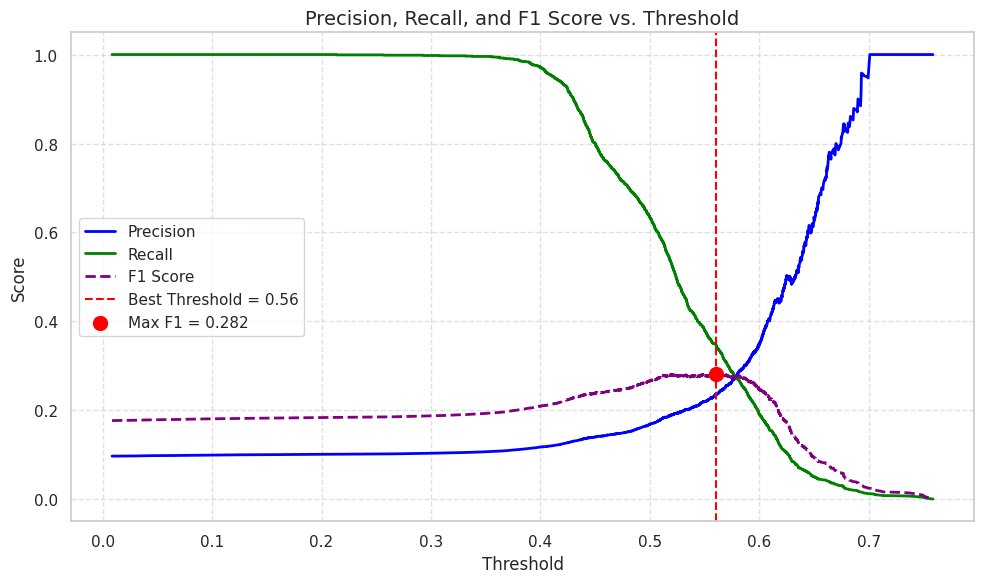


Best Threshold = 0.56
F1 Score at Best Threshold = 0.282
Precision at Best Threshold = 0.237
Recall at Best Threshold = 0.349


In [18]:
# -------------------------------
# Compute Precision, Recall, and F1 vs. Threshold for Best Model
# -------------------------------

# Get predicted probabilities for the positive class
y_probs = best_model.predict_proba(X)[:, 1] # if using train/test split use X_test

# Compute precision, recall, and thresholds
precisions, recalls, thresholds = precision_recall_curve(y, y_probs) # if using train/test split use y_test

# Compute F1 for each threshold
denominator = precisions[:-1] + recalls[:-1]
f1_scores = np.where(
    denominator == 0,
    0,
    2 * (precisions[:-1] * recalls[:-1]) / denominator
)

# Find the threshold with maximum F1
best_idx = f1_scores.argmax()
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

# -------------------------------
# Plot Precision, Recall, and F1 vs. Threshold
# -------------------------------

plt.figure(figsize=(10, 6))

plt.plot(thresholds, precisions[:-1], label="Precision", color="blue", linewidth=2)
plt.plot(thresholds, recalls[:-1], label="Recall", color="green", linewidth=2)
plt.plot(thresholds, f1_scores, label="F1 Score", color="purple", linestyle='--', linewidth=2)

plt.axvline(x=best_threshold, color='red', linestyle='--', label=f'Best Threshold = {best_threshold:.2f}')
plt.scatter(best_threshold, best_f1, color='red', s=100, zorder=5, label=f'Max F1 = {best_f1:.3f}')

plt.title("Precision, Recall, and F1 Score vs. Threshold", fontsize=14)
plt.xlabel("Threshold", fontsize=12)
plt.ylabel("Score", fontsize=12)

plt.legend(loc='best')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# -------------------------------
# Print Key Threshold Stats
# -------------------------------

print(f"\nBest Threshold = {best_threshold:.2f}")
print(f"F1 Score at Best Threshold = {best_f1:.3f}")
print(f"Precision at Best Threshold = {precisions[best_idx]:.3f}")
print(f"Recall at Best Threshold = {recalls[best_idx]:.3f}")

### Feature Importance and Model Explanation

A key question in this project is: **Which variables are most predictive of customer churn?**

This analysis consolidates feature importance scores from three different models:
- **Decision Tree**
- **Random Forest**
- **Logistic Regression (absolute coefficients as importance)**

By comparing multiple models, this approach provides a more robust understanding of which features are consistently influential in predicting churn.

---

### How Feature Importance Is Computed

- **Decision Tree and Random Forest:**  
Importance is based on how much each feature decreases impurity (such as Gini impurity) when used to split nodes. A higher value indicates greater importance in segmenting churners from non-churners.

- **Logistic Regression:**  
Feature importance is calculated as the **absolute value of the standardized model coefficients**.  
> **Note:** This method reflects the **magnitude** of influence but does **not capture directionality** (whether a feature increases or decreases churn probability).

- **Mean Importance Across Models:**  
An average of the importance scores from the three models is calculated to provide an aggregated ranking. The top 15 features are displayed based on this average.

---

### Interpretation of the Plot and Table

- Features that rank highly across all models are strong predictors of churn.
- The bar chart shows side-by-side comparisons of feature importance for:
  - **Decision Tree**
  - **Random Forest**
  - **Logistic Regression (absolute coefficients)**

- This multi-model perspective reduces reliance on any single modeling assumption (linearity vs. non-linearity, etc.).

---

### Key Observations

- Variables such as:
  - **`pow_max`** (subscribed power)
  - **`forecast_cons_12m`** (forecasted 12-month consumption)
  - **`cons_12m`** (past 12-month consumption)
  - **`nb_prod_act`** (number of active products)
  - **`contract_tenure_months`** (customer tenure)
- frequently appear as highly important across all models.

- This indicates that factors related to **usage patterns**, **contract length**, and **product engagement** are strong predictors of customer churn.

---

### How to Interpret the Chart

- **For Decision Tree and Random Forest:**  
A higher importance score means the feature contributes more to splitting the data in a way that reduces classification error.

- **For Logistic Regression:**  
A higher absolute coefficient value indicates a stronger association with churn likelihood, regardless of whether it increases or decreases that likelihood.  
> The direction (positive/negative) is **not represented** in this chart.

- **For Mean Importance:**  
Features with high average scores across models are likely to be robust predictors under varying assumptions about the data.

---

### Business Implications

- **Contract tenure (`contract_tenure_months`) and long-term status (`is_long_term_customer`)** are consistently important, suggesting that newer customers are more prone to churn.

- **Product depth (`nb_prod_act`)** is highly predictive; customers with more products tend to churn less, indicating that cross-selling additional services could reduce churn.

- **Usage-related features (`forecast_cons_12m`, `cons_12m`, `pow_max`)** indicate that patterns in consumption behavior are significant churn predictors, suggesting that usage monitoring could trigger proactive retention efforts.

- These insights can directly inform PowerCo’s **customer retention strategies**, **targeted marketing**, and **customer engagement initiatives**.

---

### Process Alignment

This step corresponds to the following sections of the project template (*Analytics CRISP DM-Template revised.docx*):
- **"Model Assessment"**
- **"Variable Importance Report"**
- **"Assess Model"**

It is part of the **Modeling phase of the CRISP-DM framework**, focusing on interpreting model outputs to understand the key drivers of churn.

---

### Textbook References

- **Chapter 5 - Predictive Modeling**, which emphasizes understanding model outputs, including feature importance from decision trees and coefficient interpretation from logistic regression.
- **Chapter 6 - Model Evaluation**, which discusses how models should not only be evaluated for performance but also interpreted for insights that drive business decisions.


,DecisionTree,RandomForest,LogisticRegression,MeanImportance
consumption_variance,0.348351,0.224012,0.480247,0.350870
contract_tenure_months,0.324016,0.191406,0.296633,0.270685
price_off_peak_var,0.189715,0.167113,0.050488,0.135772
recent_consumption_ratio,0.028128,0.143574,0.162208,0.111303
estimated_annual_revenue,0.086663,0.119043,0.117590,0.107766
forecast_cons_12m,0.000000,0.127746,0.164913,0.097553
has_gas_service,0.000000,0.014220,0.092040,0.035420
num_active_products,0.023127,0.012885,0.044416,0.026809
is_long_term_customer,0.000000,0.000000,0.048614,0.016205


<Figure size 1000x800 with 0 Axes>

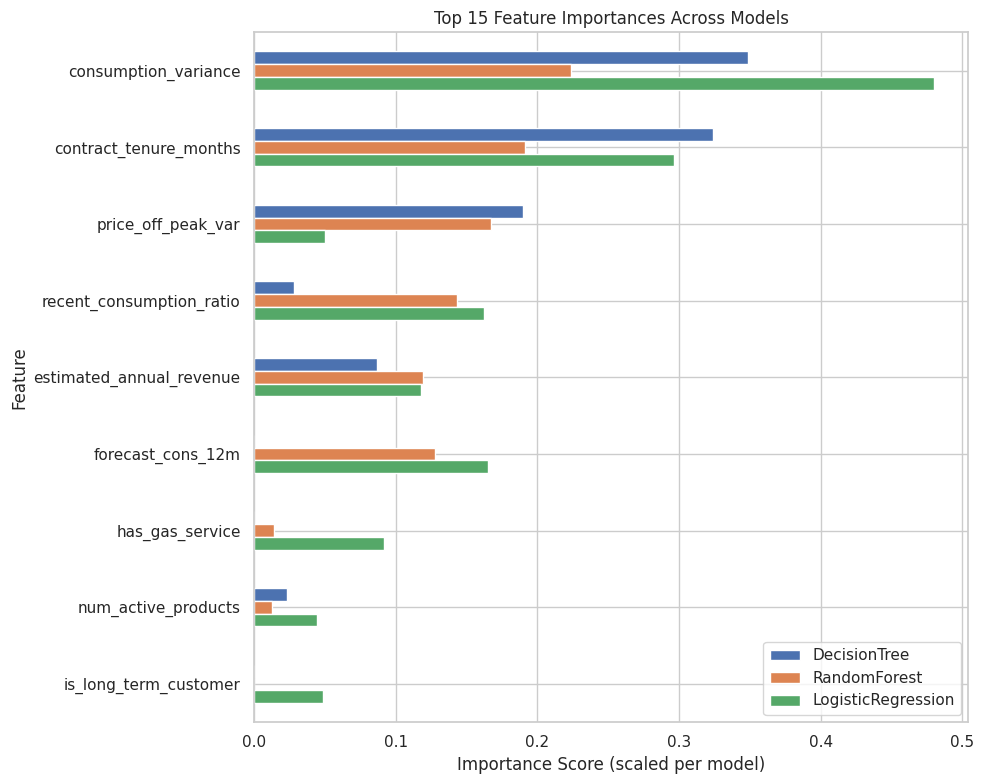

In [19]:
# ---------------------------
# Consolidated Feature Importance Across Models
# ---------------------------

# Feature importance from Decision Tree
dt_importances = pd.Series(
    dt_model.feature_importances_,
    index=X.columns, #no need to change even for test/train split
    name='DecisionTree'
)

# Feature importance from Random Forest
rf_importances = pd.Series(
    rf_model.feature_importances_,
    index=X.columns,
    name='RandomForest'
)

# Coefficients from Logistic Regression (absolute value for importance)
log_importances = pd.Series(
    np.abs(log_model.coef_[0]),
    index=X.columns,
    name='LogisticRegression'
)

# Combine into a single DataFrame
feature_importance_df = pd.concat([dt_importances, rf_importances, log_importances], axis=1)

# Fill NaNs with 0 (in case some features are unused in tree splits)
feature_importance_df = feature_importance_df.fillna(0)

# Add a mean importance score across models for sorting
feature_importance_df['MeanImportance'] = feature_importance_df.mean(axis=1)

# Sort by mean importance descending
feature_importance_df = feature_importance_df.sort_values(by='MeanImportance', ascending=False)

# Display top 15 features
feature_importance_df_top = feature_importance_df.head(15)

display(feature_importance_df_top)

# Plot
plt.figure(figsize=(10, 8))
feature_importance_df_top[['DecisionTree', 'RandomForest', 'LogisticRegression']].plot(
    kind='barh',
    figsize=(10, 8)
)
plt.title('Top 15 Feature Importances Across Models')
plt.xlabel('Importance Score (scaled per model)')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## Threshold-Based Customer Targeting for Retention Interventions

This step applies the previously selected churn prediction model to compute churn probabilities for the **entire customer dataset** and converts those probabilities into binary decisions for retention targeting based on the threshold that **maximizes the F1 score**.

---

### Process Description

1. **Scoring Customers:**  
- The best-performing model (selected based on cross-validated ROC AUC) is used to compute **churn probabilities** for all customers in the dataset.

2. **Applying the Threshold:**  
- The threshold is set to the value that achieved the **maximum F1 score** in the previous precision-recall analysis.
- Customers with a **churn probability greater than or equal to the threshold** are flagged as high-risk and marked with **`Target_for_Retention = True`**.

3. **Output Generation:**  
A final output table is created that includes:
- **Customer ID (`id`)**
- **Churn Probability (`Churn_Probability`)**
- **Churn Prediction (`Churn_Prediction`)** - binary (1 = predicted to churn, 0 = predicted to stay)
- **Retention Flag (`Target_for_Retention`)** - boolean (True/False)
- **Estimated Annual Revenue (`estimated_annual_revenue`)** - calculated as **forecasted annual electricity consumption multiplied by the latest off-peak price.** This field is included to support financial analysis of retention strategies.

4. **Operational Summary:**  
- The code calculates:
  - The total number of customers flagged for retention.
  - The percentage of the customer base targeted for retention based on the selected threshold.

5. **Visualization:**  
- A histogram displays the distribution of churn probabilities across the customer base.
- A vertical dashed red line indicates the threshold applied for retention targeting, providing a visual sense of the size of the high-risk group relative to the overall distribution.

6. **Export:**  
- The output is saved as **`Churn_Scoring_and_Targeting_Results.csv`**, which can be provided to operational teams for use in retention campaigns and to support financial modeling such as revenue-at-risk calculations and offer cost analysis.

---

### Business Interpretation

- Customers with **`Target_for_Retention = True`** represent those at **high risk of churn**.
- The targeting summary informs:
  - The **size of the retention campaign**,
  - Resource requirements,
  - Budget allocation for incentives or interventions.
- The inclusion of **`estimated_annual_revenue`** directly supports evaluating the financial impact of churn and the potential cost-benefit of offering discounts or retention incentives.
- The histogram helps confirm whether the selected threshold identifies a manageable and meaningful segment of the customer base.

- **Important Note:**  
The threshold used is based on optimizing the F1 score, meaning it balances precision (avoiding unnecessary offers) and recall (capturing as many churners as possible). However, the threshold could be adjusted further based on specific business priorities, such as prioritizing **higher recall** if the cost of churn is very high, or **higher precision** if retention costs are significant.

---

### Data Dictionary for Scoring Output

| Column                  | Description                                             |
|-------------------------|---------------------------------------------------------|
| id                      | Unique Customer Identifier                              |
| estimated_annual_revenue| Annual revenue estimate based on forecasted consumption |
| Churn_Probability       | Predicted probability of churn (0 to 1)                 |
| Churn_Prediction        | 1 = predicted churner, 0 = predicted to stay            |
| Target_for_Retention    | True if customer exceeds churn threshold                |
| Model_Used              | Name of the model used for scoring                      |

---

### Process Alignment

This step aligns with the following sections of the project template (*Analytics CRISP DM-Template revised.docx*):
- **"Deploy Results"**
- **"Generate Scoring Output"**
- **"Model Assessment and Decision Rules"**
- **"Benefit vs. Cost Modeling"** through the inclusion of revenue estimates in the output table, this step directly supports financial impact assessments tied to the retention strategy.

It is part of the **Deployment phase of the CRISP-DM framework**, where the analytical model's outputs are translated into actionable business decisions, specifically focusing on identifying customers for retention outreach and enabling financial evaluation of those decisions.

---

### Textbook References

- **Chapter 6 - Model Evaluation**, which emphasizes the importance of moving beyond probability outputs to apply decision thresholds that align with operational and business goals.
- **Chapter 7 - Deployment**, which covers the final step of operationalizing model outputs, including generating scoring tables, applying decision rules for interventions, and linking model results to business value.



Summary of Targeting:
Customers flagged for retention: 2088 out of 14606
Percentage of customers targeted: 14.3%

Top targeted customers with highest churn probability:


,id,estimated_annual_revenue,Churn_Probability,Churn_Prediction,Model_Used,Target_for_Retention
2291,65cb91b93ad5b39b874e5defd8f96952,34.410876,0.758601,1,Random Forest,True
2697,48cfc269f12b3ab04b09a2ffff2f6d22,40.532418,0.751815,1,Random Forest,True
1527,bb8201b3065bc1f08b881a59e2a7feca,44.609172,0.751815,1,Random Forest,True
4691,075ded2164a5dbaa0a5791ad9f7018f8,44.576398,0.751815,1,Random Forest,True
3996,ed050009229e0ae62d319ea54c31251d,47.359306,0.748925,1,Random Forest,True
9660,faf60d1008a80d7e557d762a3988860c,46.401746,0.748925,1,Random Forest,True
4530,f8a228fe22a971a987fa8ee47615fc70,48.031878,0.748925,1,Random Forest,True
4948,f6069905f61b9357bf9f389dbd6e767b,0.000000,0.738408,1,Random Forest,True
1579,782d072e7b10d8447b4f8b2dd23cab7c,0.000000,0.738408,1,Random Forest,True
11078,80d5382bbd1bd1755a3c00e65bfb2199,0.000000,0.738408,1,Random Forest,True


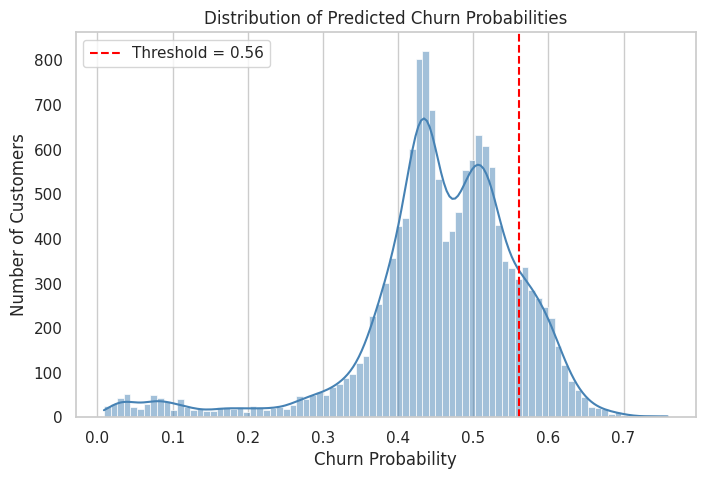


***Results saved to 'Churn_Scoring_and_Targeting_Results.csv'


In [20]:
# -------------------------------
# Scoring Customers for Retention
# -------------------------------

# Step 1: Generate churn probability for each customer
churn_probabilities = best_model.predict_proba(X)[:, 1] #if using the test/train split use X_test

# Step 2: Apply the threshold determined earlier
threshold = best_threshold # can override if desired

# Step 3: Create churn prediction (1 = predicted to churn, 0 = predicted to stay)
churn_predictions = (churn_probabilities >= threshold).astype(int)

# Step 4: Create the output table with customer ID, churn probability, and prediction
scoring_output = abt[['id', 'estimated_annual_revenue']].copy()
scoring_output['Churn_Probability'] = churn_probabilities
scoring_output['Churn_Prediction'] = churn_predictions
scoring_output['Model_Used'] = best_model_name

# Step 5: Flag customers for retention action based on the threshold
scoring_output['Target_for_Retention'] = scoring_output['Churn_Probability'] >= threshold

# -------------------------------
# Summary of Targeting
# -------------------------------

# Number and percentage of customers flagged for retention
num_targeted = scoring_output['Target_for_Retention'].sum()
total_customers = scoring_output.shape[0]
percent_targeted = round(100 * num_targeted / total_customers, 2)

print("\nSummary of Targeting:")
print(f"Customers flagged for retention: {num_targeted} out of {total_customers}")
print(f"Percentage of customers targeted: {percent_targeted}%")

# Display the top customers with the highest churn probability
print("\nTop targeted customers with highest churn probability:")
display(
    scoring_output[scoring_output['Target_for_Retention']]
    .sort_values(by='Churn_Probability', ascending=False)
    .head(10)
)

# -------------------------------
# Plot Churn Probability Distribution with Threshold
# -------------------------------

plt.figure(figsize=(8, 5))
sns.histplot(scoring_output['Churn_Probability'], kde=True, color="steelblue")
plt.axvline(
    x=threshold,
    color='red',
    linestyle='--',
    label=f'Threshold = {threshold:.2f}'
)
plt.title('Distribution of Predicted Churn Probabilities')
plt.xlabel('Churn Probability')
plt.ylabel('Number of Customers')
plt.legend()
plt.grid(axis='y')
plt.show()

# -------------------------------
# Save the Results to CSV
# -------------------------------

scoring_output.to_csv('Churn_Scoring_and_Targeting_Results.csv', index=False)
print("\n***Results saved to 'Churn_Scoring_and_Targeting_Results.csv'")


## Evaluating the Financial Impact of Offering a 20% Discount to At-Risk Customers

This section estimates whether offering a **20% discount** to customers identified as high churn risk is financially beneficial. It integrates predicted churn probabilities with estimated customer revenue to assess the trade-off between potential revenue loss from churn and the cost of retention incentives.

---

### Process Description

1. **Use Existing Financial Data:**  
- **`estimated_annual_revenue`** was already computed during the ABT construction (using forecasted 12-month consumption × latest off-peak price).
- The financial analysis starts directly from the **`scoring_output`**, which contains churn probabilities, predictions, retention flags, and revenue estimates.

2. **Identify Targeted Customers:**  
- Customers flagged as **`Target_for_Retention = True`** are those whose churn probability is **greater than or equal to the F1-optimized threshold (`best_threshold`)**.

3. **Compute Expected Revenue at Risk:**  
- For each targeted customer:  
**Expected Revenue at Risk = Churn Probability × Estimated Annual Revenue.**  
- This reflects the **probabilistic expected financial loss** if that customer were to churn.

4. **Calculate Retention Offer Cost:**  
- The retention offer is modeled as a **20% discount** on annual revenue for each targeted customer.

5. **Evaluate Financial Impact:**  
- Key financial metrics are computed:
   - **Total Expected Revenue Saved:** The sum of expected revenue at risk across all targeted customers.
   - **Total Discount Cost:** 20% of total annual revenue for all targeted customers.
   - **Net Benefit:**  
   **Net Benefit = Total Expected Revenue Saved - Total Discount Cost.**

6. **Decision Logic:**  
- If **Net Benefit > 0**, the retention campaign is considered financially beneficial under current assumptions.  
- If **Net Benefit < 0**, the campaign may not be justified without adjusting parameters such as the threshold, discount rate, or target group.

---

### Visualizations

- **Churn Probability vs. Estimated Annual Revenue (Scatter Plot):**  
  - Visualizes customers by churn probability (x-axis) and estimated annual revenue (y-axis).
  - Customers flagged for retention are shown in **red**, and others in **green**.
  - Helps identify high-revenue, high-risk customers.

- **Cumulative Revenue at Risk (Line Plot):**  
  - Customers are ranked by churn probability (highest to lowest).
  - Shows how cumulative revenue at risk accumulates as more customers are targeted.
  - Useful for assessing whether focusing on the very highest-risk customers captures most of the financial risk.

---

### Key Assumptions and Limitations

- **Revenue Estimation:**  
Revenue is approximated using **forecasted consumption × off-peak price**, excluding fixed charges or peak-hour pricing.

- **Model Dependency:**  
The accuracy of financial projections depends directly on the predictive accuracy of the churn model.

- **Uniform Offer Strategy:**  
Assumes a flat **20% discount** applies to all targeted customers without personalization.

- **Static Offer Logic:**  
This analysis does not yet account for dynamic discounting strategies based on customer value, churn risk level, or price sensitivity.

---

### Process Alignment

This step aligns with the following components in the project template (*Analytics CRISP DM-Template revised.docx*):
- **"Deploy Results"**
- **"Business Impact Assessment"**
- **"Benefit vs. Cost Modeling"**

It forms part of the **Deployment phase** of the CRISP-DM framework, translating predictive model outputs into **financial decision-making and operational strategy.**

---

### Textbook References

- **Chapter 7 - Deployment**, focused on transforming model outputs into business actions and financial outcomes.
- **Chapter 6 - Model Evaluation**, emphasizing the use of probability-based decision-making instead of simple binary predictions.


Number of customers targeted: 2088
Total expected revenue at risk (saved if churn prevented): $458,365.38
Total cost of offering 20% discount: $153,207.08
Net financial impact: $305,158.30

Conclusion: Offering the 20% discount is financially beneficial.


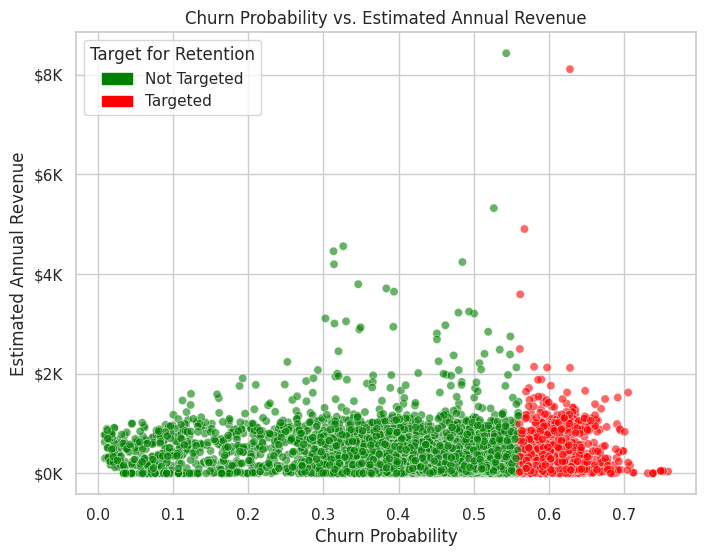

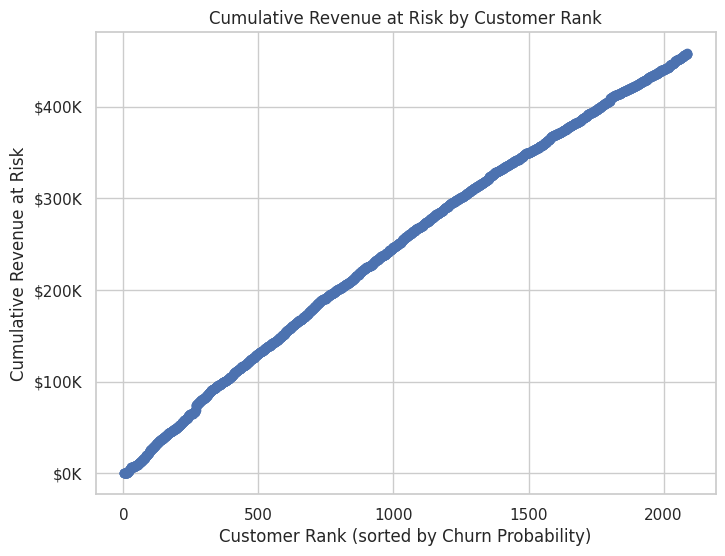

In [21]:
# ---------------------------------
# Financial Impact Analysis of Retention Offer
# ---------------------------------

# ---------------------------------
# Prepare financial dataset
# ---------------------------------

# Copy scoring output directly; no need for merging with price data again
scoring_with_financials = scoring_output.copy()

# ---------------------------------
# Filter targeted customers (those flagged for retention)
# ---------------------------------

targeted_customers = scoring_with_financials[
    scoring_with_financials['Target_for_Retention'] == True
].copy()

# ---------------------------------
# Calculate expected revenue at risk and financial impact
# ---------------------------------

# Revenue at risk = churn probability × annual revenue
targeted_customers['expected_revenue_at_risk'] = (
    targeted_customers['Churn_Probability'] * targeted_customers['estimated_annual_revenue']
)

# Total revenue at risk saved if churn prevented
total_expected_revenue_saved = targeted_customers['expected_revenue_at_risk'].sum()

# Total cost of offering a 20% discount to all targeted customers
total_discount_cost = targeted_customers['estimated_annual_revenue'].sum() * 0.20

# Net financial impact
net_benefit = total_expected_revenue_saved - total_discount_cost

# ---------------------------------
# Print the results
# ---------------------------------

print(f"Number of customers targeted: {len(targeted_customers)}")
print(f"Total expected revenue at risk (saved if churn prevented): ${total_expected_revenue_saved:,.2f}")
print(f"Total cost of offering 20% discount: ${total_discount_cost:,.2f}")
print(f"Net financial impact: ${net_benefit:,.2f}")

if net_benefit > 0:
    print("\nConclusion: Offering the 20% discount is financially beneficial.")
else:
    print("\nConclusion: Offering the 20% discount is NOT financially justified under current assumptions.")

# ---------------------------------
# Plot: Churn Probability vs Estimated Annual Revenue
# ---------------------------------

plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=scoring_with_financials,
    x='Churn_Probability',
    y='estimated_annual_revenue',
    hue='Target_for_Retention',
    palette={True: 'red', False: 'green'},
    alpha=0.6,
    legend=False
)

plt.title('Churn Probability vs. Estimated Annual Revenue')
plt.xlabel('Churn Probability')
plt.ylabel('Estimated Annual Revenue')

plt.gca().yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f'${x/1000:,.0f}K')
)

plt.grid(True)

red_patch = mpatches.Patch(color='red', label='Targeted')
green_patch = mpatches.Patch(color='green', label='Not Targeted')
plt.legend(handles=[green_patch, red_patch], title='Target for Retention')

plt.show()

# ---------------------------------
# Plot: Cumulative Revenue at Risk by Customer Rank
# ---------------------------------

# Sort customers by churn probability descending
targeted_sorted = targeted_customers.sort_values(
    by='Churn_Probability', ascending=False
).reset_index(drop=True)

# Calculate cumulative revenue at risk
targeted_sorted['cumulative_revenue_at_risk'] = (
    targeted_sorted['expected_revenue_at_risk'].cumsum()
)

plt.figure(figsize=(8, 6))
plt.plot(
    range(1, len(targeted_sorted) + 1),
    targeted_sorted['cumulative_revenue_at_risk'],
    marker='o'
)
plt.title('Cumulative Revenue at Risk by Customer Rank')
plt.xlabel('Customer Rank (sorted by Churn Probability)')
plt.ylabel('Cumulative Revenue at Risk')

plt.gca().yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, _: f'${x/1000:,.0f}K')
)

plt.grid(True)
plt.show()


## Feature Importance and Correlation Analysis

This step addresses two specific project questions regarding the drivers of churn and the relationship between power subscription and consumption behavior.

---

### 1. Key Drivers of Churn

- The **top 5 most important features** are extracted from the **best-performing model**, selected earlier based on ROC AUC.
- Feature importance is calculated as it is for tree-based models (Decision Tree or Random Forest):
   - It represents how much each feature contributes to reducing impurity (e.g., Gini impurity) across the splits in the model.
- The ranked list of top features provides insight into the key variables influencing churn risk.

- This information supports both:
   - **Model transparency**, by explaining how the model arrives at predictions.
   - **Business decision-making**, by highlighting which customer attributes are most closely linked to churn.

---

### 2. Correlation Between Subscribed Power and Consumption

- The Pearson correlation coefficient is computed between:
   - **`pow_max`** (subscribed power)
   - **`forecast_cons_12m`** (forecasted 12-month electricity consumption)
- This quantifies whether customers with higher subscribed power tend to forecast higher electricity consumption.

- The correlation value provides:
   - A **positive correlation** if customers with higher power subscriptions generally consume more.
   - A **negative correlation** if higher power subscriptions are associated with lower forecasted consumption.
   - A **near-zero correlation** if there is little to no linear relationship.

---

### Outcomes from This Step

- A **ranked list of the top 5 features** most predictive of customer churn based on the selected best model.
- A **quantified correlation coefficient** summarizing the linear relationship between power subscription (`pow_max`) and consumption forecast (`forecast_cons_12m`).

---

### Process Alignment

This step aligns with the following sections of the project template (*Analytics CRISP DM-Template revised.docx*):
- **"Data Understanding - Explore the Data"**
- **"Model Assessment - Variable Importance"**
- **"Assess Model - Model Explanation"**

It spans both the **Data Understanding** and **Modeling phases** of the **CRISP-DM framework**, providing both descriptive insights (via correlation analysis) and predictive explanations (via feature importance extraction).

---

### Textbook References

- **Chapter 3 - Data Understanding**, which emphasizes exploring relationships among variables, including correlation analysis as part of understanding data structure.
- **Chapter 5 - Predictive Modeling**, which discusses interpreting model outputs, particularly feature importance in tree-based models.
- **Chapter 6 - Model Evaluation**, which recommends using variable importance rankings to support both evaluation and stakeholder communication.


In [22]:
# -----------------------------------------------
# Extract Top Features Driving Churn
# -----------------------------------------------

# Get feature importances from the Random Forest model
feature_importances = pd.Series(
    best_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

# Select the top 5 features (adjust if needed)
top_features = feature_importances.head(5).index.tolist()

print("Top features driving churn:", top_features)

# -----------------------------------------------
# Calculate Correlation Between pow_max and forecast_cons_12m
# -----------------------------------------------

# Compute Pearson correlation coefficient
pow_max_corr = abt[['pow_max', 'forecast_cons_12m']].corr().loc['pow_max', 'forecast_cons_12m']

print(f"Correlation between pow_max and forecast_cons_12m: {pow_max_corr:.2f}")


Top features driving churn: ['consumption_variance', 'contract_tenure_months', 'price_off_peak_var', 'recent_consumption_ratio', 'forecast_cons_12m']
Correlation between pow_max and forecast_cons_12m: 0.39


# Final summary

## Process Alignment

This step aligns with the following sections of the project template (*Analytics CRISP DM-Template revised.docx*):
- **“Deploy Results”**
- **“Summary of Findings”**
- **“Business Recommendations”**
- **“Benefit vs. Cost Modeling”**

It is part of the **Deployment phase** of the **CRISP-DM framework**, where the technical results are translated into actionable, operational, and financially evaluated business decisions. This step consolidates insights from earlier phases (Data Understanding, Modeling, Evaluation) into a clear set of commercial actions tied directly to model outputs.

---

## Textbook References

- **Chapter 7 - Deployment**, which emphasizes transforming predictive model outputs into executable business strategies, operational processes, and financial assessments.
- **Chapter 6 - Model Evaluation**, which stresses the importance of using model outputs not just for prediction, but also for understanding business impact, decision thresholds, and trade-offs.
- **Chapter 5 - Predictive Modeling**, particularly regarding the importance of model interpretation and feature importance when linking analytical insights to business outcomes.


In [23]:
summary_text = f"""
## 1. Modeling Methodology

- The objective is to predict SME customers at high risk of churning and assess whether offering a **20% discount** is a financially justified retention strategy.
- Multiple models were trained and evaluated using **cross-validation**, including:
  - Logistic Regression (Standard, Weighted, SMOTE)
  - Decision Tree
  - Random Forest
- The selected model is a **Random Forest classifier**, based on its strong balance between predictive performance (**highest ROC AUC**) and interpretability.
- Data preprocessing included scaling, encoding categorical variables, and addressing class imbalance where appropriate.

---

## 2. Threshold Selection and Interpretation

- The optimal churn probability threshold was selected as **{threshold:.2f}**, based on maximizing the **F1 score**.
- The **F1 score** balances:
  - **Precision** (correctly identifying actual churners among those flagged)
  - **Recall** (capturing as many churners as possible without missing them)
- This threshold balances the cost of false positives (offering discounts to customers who may not churn) with the cost of false negatives (losing customers who were not flagged).

---

## 3. Key Findings

- **Churn Prediction:**
   **{num_targeted:,} customers out of {total_customers:,}** (~**{percent_targeted:.1f}%**) are flagged as high risk for churn.
- **Feature Importance (Churn Drivers):**
   The most influential variables driving churn include: **{', '.join(top_features)}**.
- **Correlation Insight:**
   There is a **{"positive" if pow_max_corr > 0 else "negative" if pow_max_corr < 0 else "no"} correlation** between **subscribed power (`pow_max`)** and **forecasted consumption (`forecast_cons_12m`)**, with a correlation coefficient of **{pow_max_corr:.2f}**.
- **Channel Impact on Churn:**
   Churn rates vary across sales channels (`channel_sales`), indicating that some channels are more prone to customer churn than others.

---

## 4. Recommended Commercial Actions

### 4.1 Targeted Retention Campaign
- **Action:** Offer a **20% discount** to customers whose churn probability is **≥ {threshold:.2f}**.
- **Goal:** Retain high-risk customers and reduce revenue loss from churn.

### 4.2 Operational Execution
- Generate the target list where `Target_for_Retention == True`.
- Deploy via CRM-triggered campaigns, email, or account manager outreach.
- Present the offer as a **loyalty reward**, not a reactive churn intervention, to protect brand perception.

### 4.3 Financial Assessment
- **Expected Revenue at Risk:** **\${total_expected_revenue_saved:,.2f}**
- **Cost of 20% Discount:** **\${total_discount_cost:,.2f}**
- **Net Financial Impact:** **\${net_benefit:,.2f}**

- **Decision Rule:**
 **{"The campaign is financially beneficial." if net_benefit > 0 else "The campaign is NOT financially justified under current assumptions."}**

---

## 5. Business Process Integration

- Embed the model output and targeting rules into the **CRM system**.
- Distribute lists of targeted customers to relevant operational teams.
- Refresh predictions **quarterly**, aligned with the model's predictive window (3 months).

---

## 6. Monitoring and Maintenance

- Monitor key KPIs:
  - Churn rate reduction in targeted customers.
  - Offer acceptance rate.
  - Realized financial impact relative to projections.
- Retrain the model and revisit thresholds as business dynamics change.

---

## 7. Limitations and Assumptions

- The model is based on historical data; if market conditions change (e.g., regulation, competition, pricing), model performance may degrade.
- Financial impact estimates assume:
  - Churn probabilities translate directly to potential revenue loss.
  - Customers accept the 20% discount offer.
  - Offering the discount prevents churn at a meaningful rate.
- The analysis does not factor in customer satisfaction, potential brand dilution, or competitor reactions.

---

## 8. Future Considerations

- Explore alternatives beyond price discounts, such as:
  - Loyalty programs, premium service tiers, flexible contracts.
- Test varying discount levels (**e.g., 10%, 15%, 25%**) to optimize financial return.
- Enhance the model by incorporating behavioral, transactional, or market-level data.

---

## 9. Summary of Commercial Actions Aligned to Model Results

| Component              | Recommendation                                    |
|------------------------|---------------------------------------------------|
| **Target Group**       | Customers with churn probability ≥ {threshold:.2f}|
| **Offer**              | 20% discount on annual bill                       |
| **Customers Targeted** | {num_targeted} (**{percent_targeted:.1f}%** of {total_customers}) |
| **Decision Rule**      | Deploy if **Net Benefit > 0**                     |
| **Delivery Method**    | CRM-driven outreach, Account Manager follow-up    |
| **Review Cycle**       | Quarterly                                          |

---
"""

display(Markdown(summary_text))



## 1. Modeling Methodology

- The objective is to predict SME customers at high risk of churning and assess whether offering a **20% discount** is a financially justified retention strategy.
- Multiple models were trained and evaluated using **cross-validation**, including:
  - Logistic Regression (Standard, Weighted, SMOTE)
  - Decision Tree
  - Random Forest
- The selected model is a **Random Forest classifier**, based on its strong balance between predictive performance (**highest ROC AUC**) and interpretability.
- Data preprocessing included scaling, encoding categorical variables, and addressing class imbalance where appropriate.

---

## 2. Threshold Selection and Interpretation

- The optimal churn probability threshold was selected as **0.56**, based on maximizing the **F1 score**.
- The **F1 score** balances:
  - **Precision** (correctly identifying actual churners among those flagged)
  - **Recall** (capturing as many churners as possible without missing them)
- This threshold balances the cost of false positives (offering discounts to customers who may not churn) with the cost of false negatives (losing customers who were not flagged).

---

## 3. Key Findings

- **Churn Prediction:**
   **2,088 customers out of 14,606** (~**14.3%**) are flagged as high risk for churn.
- **Feature Importance (Churn Drivers):**
   The most influential variables driving churn include: **consumption_variance, contract_tenure_months, price_off_peak_var, recent_consumption_ratio, forecast_cons_12m**.
- **Correlation Insight:**
   There is a **positive correlation** between **subscribed power (`pow_max`)** and **forecasted consumption (`forecast_cons_12m`)**, with a correlation coefficient of **0.39**.
- **Channel Impact on Churn:**
   Churn rates vary across sales channels (`channel_sales`), indicating that some channels are more prone to customer churn than others.

---

## 4. Recommended Commercial Actions

### 4.1 Targeted Retention Campaign
- **Action:** Offer a **20% discount** to customers whose churn probability is **≥ 0.56**.
- **Goal:** Retain high-risk customers and reduce revenue loss from churn.

### 4.2 Operational Execution
- Generate the target list where `Target_for_Retention == True`.
- Deploy via CRM-triggered campaigns, email, or account manager outreach.
- Present the offer as a **loyalty reward**, not a reactive churn intervention, to protect brand perception.

### 4.3 Financial Assessment
- **Expected Revenue at Risk:** **\$458,365.38**
- **Cost of 20% Discount:** **\$153,207.08**
- **Net Financial Impact:** **\$305,158.30**

- **Decision Rule:**
 **The campaign is financially beneficial.**

---

## 5. Business Process Integration

- Embed the model output and targeting rules into the **CRM system**.
- Distribute lists of targeted customers to relevant operational teams.
- Refresh predictions **quarterly**, aligned with the model's predictive window (3 months).

---

## 6. Monitoring and Maintenance

- Monitor key KPIs:
  - Churn rate reduction in targeted customers.
  - Offer acceptance rate.
  - Realized financial impact relative to projections.
- Retrain the model and revisit thresholds as business dynamics change.

---

## 7. Limitations and Assumptions

- The model is based on historical data; if market conditions change (e.g., regulation, competition, pricing), model performance may degrade.
- Financial impact estimates assume:
  - Churn probabilities translate directly to potential revenue loss.
  - Customers accept the 20% discount offer.
  - Offering the discount prevents churn at a meaningful rate.
- The analysis does not factor in customer satisfaction, potential brand dilution, or competitor reactions.

---

## 8. Future Considerations

- Explore alternatives beyond price discounts, such as:
  - Loyalty programs, premium service tiers, flexible contracts.
- Test varying discount levels (**e.g., 10%, 15%, 25%**) to optimize financial return.
- Enhance the model by incorporating behavioral, transactional, or market-level data.

---

## 9. Summary of Commercial Actions Aligned to Model Results

| Component              | Recommendation                                    |
|------------------------|---------------------------------------------------|
| **Target Group**       | Customers with churn probability ≥ 0.56|
| **Offer**              | 20% discount on annual bill                       |
| **Customers Targeted** | 2088 (**14.3%** of 14606) |
| **Decision Rule**      | Deploy if **Net Benefit > 0**                     |
| **Delivery Method**    | CRM-driven outreach, Account Manager follow-up    |
| **Review Cycle**       | Quarterly                                          |

---


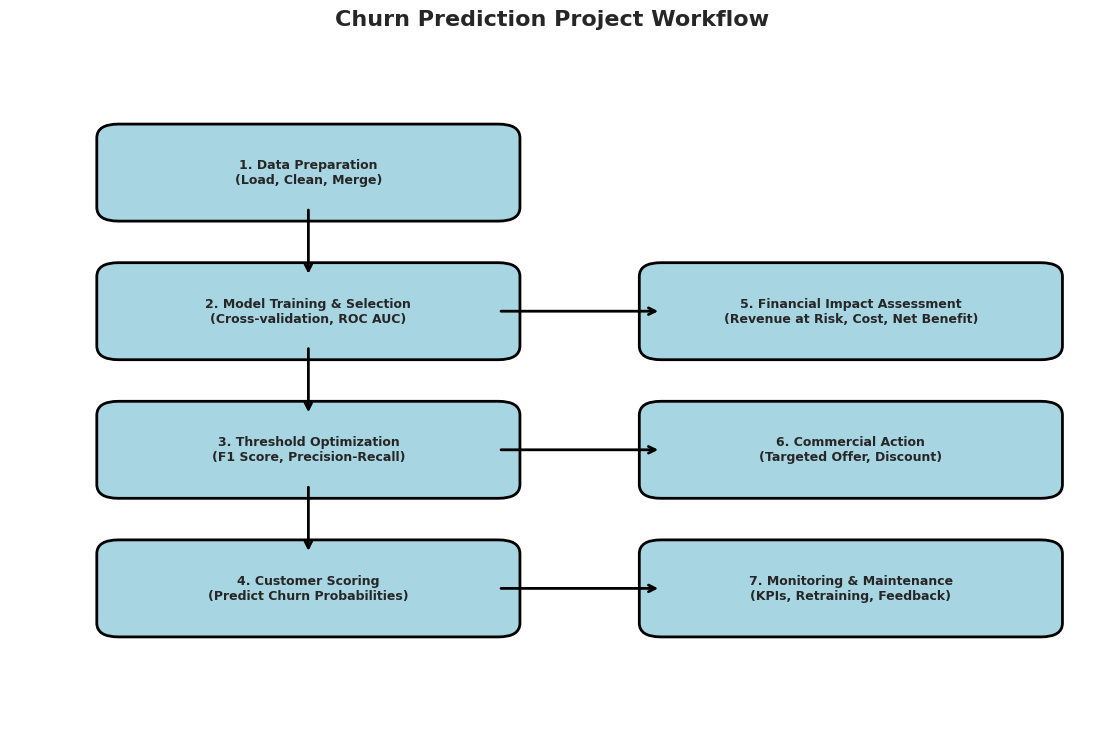

In [24]:
plt.figure(figsize=(14, 9))
ax = plt.gca()
ax.axis('off')

# Define box positions
boxes = {
    "1. Data Preparation\n(Load, Clean, Merge)": (0.1, 0.75),
    "2. Model Training & Selection\n(Cross-validation, ROC AUC)": (0.1, 0.55),
    "3. Threshold Optimization\n(F1 Score, Precision-Recall)": (0.1, 0.35),
    "4. Customer Scoring\n(Predict Churn Probabilities)": (0.1, 0.15),
    "5. Financial Impact Assessment\n(Revenue at Risk, Cost, Net Benefit)": (0.6, 0.55),
    "6. Commercial Action\n(Targeted Offer, Discount)": (0.6, 0.35),
    "7. Monitoring & Maintenance\n(KPIs, Retraining, Feedback)": (0.6, 0.15)
}

# Draw boxes with step numbers and sub-labels
for label, (x, y) in boxes.items():
    box = FancyBboxPatch(
        (x, y), 0.35, 0.1,
        boxstyle="round,pad=0.02",
        linewidth=2,
        edgecolor="black",
        facecolor="#a8d5e2"
    )
    ax.add_patch(box)
    ax.text(
        x + 0.175, y + 0.05, label,
        fontsize=9, ha='center', va='center', weight='bold'
    )

# Draw vertical arrows for the core modeling pipeline
vertical_pairs = [
    ("1. Data Preparation\n(Load, Clean, Merge)", "2. Model Training & Selection\n(Cross-validation, ROC AUC)"),
    ("2. Model Training & Selection\n(Cross-validation, ROC AUC)", "3. Threshold Optimization\n(F1 Score, Precision-Recall)"),
    ("3. Threshold Optimization\n(F1 Score, Precision-Recall)", "4. Customer Scoring\n(Predict Churn Probabilities)")
]

for start, end in vertical_pairs:
    x = boxes[start][0] + 0.175
    y_start = boxes[start][1]
    y_end = boxes[end][1] + 0.1
    ax.annotate(
        '', xy=(x, y_end), xytext=(x, y_start),
        arrowprops=dict(arrowstyle='->', color="black", linewidth=2)
    )

# Draw horizontal arrows to financial and commercial steps
horizontal_pairs = [
    ("2. Model Training & Selection\n(Cross-validation, ROC AUC)", "5. Financial Impact Assessment\n(Revenue at Risk, Cost, Net Benefit)"),
    ("3. Threshold Optimization\n(F1 Score, Precision-Recall)", "6. Commercial Action\n(Targeted Offer, Discount)"),
    ("4. Customer Scoring\n(Predict Churn Probabilities)", "7. Monitoring & Maintenance\n(KPIs, Retraining, Feedback)")
]

for start, end in horizontal_pairs:
    x_start = boxes[start][0] + 0.35
    x_end = boxes[end][0]
    y = boxes[start][1] + 0.05
    ax.annotate(
        '', xy=(x_end, y), xytext=(x_start, y),
        arrowprops=dict(arrowstyle='->', color="black", linewidth=2)
    )

plt.title("Churn Prediction Project Workflow", fontsize=16, weight='bold')
plt.show()


# Deployment

## Saving the Model, Threshold, and Feature Metadata for Deployment

This section prepares the model and its associated parameters for deployment to future datasets or production environments. It ensures that the model, the decision threshold, and the feature schema are preserved accurately for operational use.

---

### Process Description

1. **Save the Best Model:**  
- The trained best-performing model is saved as a `.pkl` file using `joblib`.  
- This file includes the model object with all fitted parameters and configurations.

2. **Save the Decision Threshold:**  
- The threshold used to convert churn probabilities into binary churn predictions is saved as a `.json` file.  
- This ensures that the same decision rule can be applied consistently during future scoring or deployment.

3. **Save the Feature List:**  
- The ordered list of features used during model training is saved as a `.json` file.  
- This is critical to maintain consistency in how incoming data is structured when applied to the model.  
- It prevents errors related to mismatched feature order or missing variables in future data.

---

### Files Created

- **`best_model.pkl`** - Serialized model file (e.g., Random Forest, Logistic Regression, etc.).  
- **`best_threshold.json`** - JSON file storing the best threshold value, structured as:  
```json
{"best_threshold": 0.xx}
```
- **`model_features.json`** - JSON file listing the feature names in the correct order for deployment.

---

### Purpose and Benefits

- Enables the model to be deployed to **new unseen data** consistently.  
- Ensures that the **classification threshold** is carried forward, preserving the balance between precision and recall as determined in the modeling phase.  
- Prevents future errors due to incorrect **feature alignment** by explicitly saving the feature order used during training.  
- Forms the foundation for **batch scoring**, **real-time scoring APIs**, or **integration with CRM systems**.

---

### Process Alignment

This step aligns with the following components in the project template (*Analytics CRISP DM-Template revised.docx*):  
- **"Deploy Results"**  
- **"Document Model Parameters"**  
- **"Prepare Scoring Artifacts"**  

It forms part of the **Deployment phase of the CRISP-DM framework**, ensuring that the model transitions from development into production with complete reproducibility.

---

### Textbook References

This deployment approach aligns with:  
- **Chapter 7 - Deployment**, which covers operationalizing machine learning models, including saving models and related artifacts.  
- **Chapter 6 - Model Evaluation**, emphasizing that the chosen threshold and feature schema are critical components of the deployed model’s behavior.

---


In [25]:
# -------------------------------
# Save Model, Threshold, and Feature Metadata for Deployment
# -------------------------------

import joblib
import json

# -------------------------------
# 1. Save the Best Model
# -------------------------------

model_filename = f"best_model.pkl"
joblib.dump(best_model, model_filename)
print(f"Best model saved as '{model_filename}'")

# -------------------------------
# 2. Save the Best Threshold
# -------------------------------

threshold_filename = "best_threshold.json"
with open(threshold_filename, 'w') as f:
    json.dump({'best_threshold': best_threshold}, f)
print(f"Best threshold saved as '{threshold_filename}'")

# -------------------------------
# 3. Save the Feature Order (column names)
# -------------------------------

feature_filename = "model_features.json"
with open(feature_filename, 'w') as f:
    json.dump({'features': list(X.columns)}, f)
print(f"Feature list saved as '{feature_filename}'")


Best model saved as 'best_model_Random_Forest.pkl'
Best threshold saved as 'best_threshold.json'
Feature list saved as 'model_features.json'


## Loading the Model and Applying It to New Data

This section demonstrates how to **load the saved model, threshold, and feature metadata** to apply the churn prediction model to **new data for scoring or deployment purposes**.

---

### Process Description

1. **Load the Model:**  
- The serialized model file (`best_model.pkl>`) is loaded using `joblib`.  
- This restores the trained model exactly as it was at the end of the modeling phase.

2. **Load the Threshold:**  
- The decision threshold is loaded from `best_threshold.json`.  
- This ensures consistency in churn prediction based on the F1-optimized threshold used during training.

3. **Load the Feature List:**  
- The ordered list of feature names is loaded from `model_features.json`.  
- This step guarantees that the input features are aligned correctly with how the model was trained, preventing errors from column mismatches or misordering.

---

### Applying to New Data

- A new dataset (**`new_data`**) is scored for churn risk:  
  - The dataset must include **all required features with the same column names** as those used during training.  
  - The feature order is explicitly enforced using the saved `features` list.

- The model outputs:  
  - **Churn Probability:** Probability that each customer will churn.  
  - **Churn Prediction:** A binary flag (1 = predicted to churn, 0 = predicted to stay) based on the loaded threshold.

- The output is formatted into a dataframe containing:  
  - **Customer ID** (or index)  
  - **Churn Probability**  
  - **Churn Prediction**

---

### Key Considerations

- This process supports both **batch scoring** and **real-time deployment** if integrated into operational pipelines.  
- The input data must be preprocessed to match the training data structure (e.g., feature engineering, encoding, scaling if applicable).

---

### Process Alignment

This step aligns with the **"Deploy Results"** and **"Apply Scoring Model to New Data"** sections of the project template (*Analytics CRISP DM-Template revised.docx*).  
It operationalizes the predictive model, transforming it from a development artifact into a **production-grade decision tool**.

---

### Textbook References

This deployment workflow aligns with:  
- **Chapter 7 - Deployment**, focusing on scoring new data using saved models.  
- **Chapter 6 - Model Evaluation**, reinforcing the importance of consistent decision thresholds and feature schemas in operational models.

---


In [27]:
#uncomment to use
'''
# -------------------------------
# Load Model, Threshold, and Features
# -------------------------------

import joblib
import json
import pandas as pd

# 1. Load the Model
model = joblib.load("best_model.pkl")

# 2. Load the Threshold
with open("best_threshold.json", 'r') as f:
    threshold = json.load(f)['best_threshold']

# 3. Load Feature List
with open("model_features.json", 'r') as f:
    features = json.load(f)['features']

# -------------------------------
# Apply on New Data
# -------------------------------

# Example: Assuming `new_data` is a pandas DataFrame with the right columns

# Ensure correct feature order
new_data_prepared = new_data[features]

# Get churn probabilities
churn_probabilities = model.predict_proba(new_data_prepared)[:, 1]

# Apply threshold
churn_predictions = (churn_probabilities >= threshold).astype(int)

# Output result
output = pd.DataFrame({
    'Customer_ID': new_data.index,
    'Churn_Probability': churn_probabilities,
    'Churn_Prediction': churn_predictions
})

print(output.head())
'''

'\n# -------------------------------\n# Load Model, Threshold, and Features\n# -------------------------------\n\nimport joblib\nimport json\nimport pandas as pd\n\n# 1. Load the Model\nmodel = joblib.load("best_model_Random_Forest.pkl")  # Update filename accordingly\n\n# 2. Load the Threshold\nwith open("best_threshold.json", \'r\') as f:\n    threshold = json.load(f)[\'best_threshold\']\n\n# 3. Load Feature List\nwith open("model_features.json", \'r\') as f:\n    features = json.load(f)[\'features\']\n\n# -------------------------------\n# Apply on New Data\n# -------------------------------\n\n# Example: Assuming `new_data` is a pandas DataFrame with the right columns\n\n# Ensure correct feature order\nnew_data_prepared = new_data[features]\n\n# Get churn probabilities\nchurn_probabilities = model.predict_proba(new_data_prepared)[:, 1]\n\n# Apply threshold\nchurn_predictions = (churn_probabilities >= threshold).astype(int)\n\n# Output result\noutput = pd.DataFrame({\n    \'Customer